## World Happiness Report (2005 - 2021)

The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by data from the Gallup World Poll and Lloyd’s Register Foundation, who provided access to the World Risk Poll. The Report is a survey of the overall state of global happiness. Respondents are asked to imagine a ladder on a scale of 1 (worst life imaginable) to 10 (best possible life). This concept is known as a Cantril Ladder.

The current six variables estimate the extent to which they contribute to overall happiness:
* economic production 
* social support 
* life expectancy
* freedom
* absence of corruption
* generosity  

These factors do not directly contribute to the Happiness Score, however they can help to explain differences between countries and why some rank higher than others.

* What trends may we discern; does worldwide happiness increase or decrease.
* What factors contribute most to world happiness?
* Which Regions are the "most happy" (Highest Score) ?
* What countries have the highest and lowest ladder scores?
* Which countries have a ladder score equal to or higher than United States?


The world happiness report website includes extra data related to COVID-19 mortality for year 2020.
*https://worldhappiness.report/ed/2021/*

This country Population dataset found on kaggle.com includes statistics concerning population change, population density, median age and other variables that may be used to show any possible correlations between happiness score and population stats.
*https://www.kaggle.com/tanuprabhu/population-by-country-2020*


### Method
* Load datasets 
* Clean dataframes, including standardizing any columns if needed
* Concatenate/merge datasets 
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization


Why perform this analysis?

As civilization continues to advance technologically it still faces the challenges of poverty, famine, poor health, war, and environmental damage. Thus, how can resources, manpower, and money be used to improve the lives of everyone living on earth?

At least from a broad perspective this analysis may help to answer some questions as why some countries maintain a happier population than others. At a quick glance nations that have a higher life expectancy and greater economic prosperity are happier than countries that do not share these same qualities.
Even having someone to count on in difficult times generally correlates to a happier society. 

Governments and corporations may be obligated to do what is neccessary to ensure the well-being of society. Respondents surveyed indicated that the freedom to make personal choices influences happiness. The sense of corruption from government and corporate entities does influence happiness as well.

However, the concepts of freedom and corruption are subjective and even the concept of "happiness" could be considered a subjective matter too. What makes one person happy may not neccessary evoke the same feelings in another. Therefore, it may be up to the responsibility of local, regional, and national governments to review and consider an analysis conducted by The World Happiness Report. The insights gathered from such a report may be used to allocate the appropriate resources and funding to improve the lives of society.

## Part 1
### Data Importing and Cleaning

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Load-in datasets
report = pd.read_excel("Panel Data.xls") # Historical data of years 2005 to 2020
mortalitly = pd.read_excel("Mortality.xlsx") # COVID-19 data
report_2021 = pd.read_excel("DataForFigure2.1WHR2021C2.xls") # Latest world happiness report (2021)

In [3]:
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [4]:
# Percentage of missing values 
report.apply(pd.isnull).sum()/report.shape[0] * 100

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

In [5]:
report[report.isnull().any(axis=1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.463567,9.286936,NaN,64.500000,0.592696,-0.205320,0.618038,NaN,NaN
28,Algeria,2014,6.354898,9.335159,0.818189,65.139999,NaN,NaN,NaN,0.625905,0.176866
29,Algeria,2016,5.340854,9.362022,0.748588,65.500000,NaN,NaN,NaN,0.660510,0.377112
66,Australia,2005,7.340688,10.658608,0.967892,71.400002,0.934973,NaN,0.390416,0.842648,0.238012
110,Bahrain,2012,5.027187,10.715547,0.911350,66.860001,0.681823,NaN,0.437915,0.589015,0.380815
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477133,8.214067,0.824969,53.400002,0.672685,0.011009,NaN,0.591898,0.378784
1916,Yemen,2016,3.825631,7.715108,0.775407,55.099998,0.532964,-0.150821,NaN,0.469345,0.227925
1917,Yemen,2017,3.253560,7.578437,0.789555,55.900002,0.595191,-0.146712,NaN,0.455182,0.295064
1918,Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870


## Data Cleaning and Transformation

In [6]:
# Year 2021 dataset missing values in percentages
report_2021.apply(pd.isnull).sum()/report.shape[0] * 100

Country name                                  0.0
Regional indicator                            0.0
Ladder score                                  0.0
Standard error of ladder score                0.0
upperwhisker                                  0.0
lowerwhisker                                  0.0
Logged GDP per capita                         0.0
Social support                                0.0
Healthy life expectancy                       0.0
Freedom to make life choices                  0.0
Generosity                                    0.0
Perceptions of corruption                     0.0
Ladder score in Dystopia                      0.0
Explained by: Log GDP per capita              0.0
Explained by: Social support                  0.0
Explained by: Healthy life expectancy         0.0
Explained by: Freedom to make life choices    0.0
Explained by: Generosity                      0.0
Explained by: Perceptions of corruption       0.0
Dystopia + residual                           0.0


In [7]:
report_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [8]:
# Column selection
cols_to_use = [
                "Country name",
                "Regional indicator",
                "Ladder score",
                "Logged GDP per capita",
                "Social support",
                "Healthy life expectancy",
                "Freedom to make life choices",
                "Generosity",
                "Perceptions of corruption"
              ]
# Select only columns listed above
report_2021 = report_2021[cols_to_use]

In [9]:
report_2021

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8421,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846
1,Denmark,Western Europe,7.6195,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838
2,Switzerland,Western Europe,7.5715,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698
3,Iceland,Western Europe,7.5539,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865
4,Netherlands,Western Europe,7.4640,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.5118,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377
145,Botswana,Sub-Saharan Africa,3.4665,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619
146,Rwanda,Sub-Saharan Africa,3.4147,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801
147,Zimbabwe,Sub-Saharan Africa,3.1448,7.942595,0.750470,56.200840,0.676700,-0.047346,0.820999


In [10]:
# Constructs new column with appropriate year value
report_2021["year"] = 2021

### Region Assignment

In [11]:
# Region mapping

# Read in year 2021 assigned to a new variable "region_mapper"
# Use Country as index
# Use to_dict() method 
region_mapper = pd.read_excel("DataForFigure2.1WHR2021C2.xls", index_col = "Country name").to_dict()

# Re-assign to only include region
region_mapper = region_mapper["Regional indicator"]

# Create new column "region" by country name to country in "region_mapper"
report["Region"] = report["Country name"].map(region_mapper)

In [12]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Region                            1886 non-null   object 
dtypes: flo

In [13]:
# Verify Region names
report["Region"].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [14]:
# Displays country names that do not have a region assignment
report[report["Region"].isnull()]["Country name"].unique()

array(['Angola', 'Belize', 'Bhutan', 'Central African Republic',
       'Congo (Kinshasa)', 'Cuba', 'Djibouti', 'Guyana', 'Oman', 'Qatar',
       'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname',
       'Syria', 'Trinidad and Tobago'], dtype=object)

In [15]:
# Dictionary of countries with appropriate regions
regions= {
          "Angola":"Sub-Saharan Africa",
          "Belize":"Latin America and Caribbean",
          "Bhutan":"South Asia",
          "Central African Republic":"Sub-Saharan Africa",
          "Congo (Kinshasa)":"Sub-Saharan Africa",
          "Cuba":"Latin America and Caribbean",
          "Djibouti":"Middle East and North Africa",
          "Guyana":"Latin America and Caribbean",
          "Oman":"Middle East and North Africa",
          "Qatar":"Middle East and North Africa",
          "Somalia":"Middle East and North Africa",
          "Somaliland region":"Middle East and North Africa",
          "South Sudan":"Sub-Saharan Africa",
          "Sudan":"Middle East and North Africa",
          "Suriname":"Latin America and Caribbean",
          "Syria":"Middle East and North Africa",
          "Trinidad and Tobago":"Latin America and Caribbean"
          }

# Fill in missing region names
report["Region"] = report["Region"].fillna(report["Country name"].apply(lambda x: regions.get(x))) # Apply lambda function to map region to country

In [16]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
 11  Region                            1949 non-null   object 
dtypes: flo

### Column Renaming and DataFrame Concatenation

In [17]:
# Column names
print("Main dataframe columns")
print(report.columns)
print("\n")
print("Year 2021 columns")
print(report_2021.columns)

Main dataframe columns
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Region'],
      dtype='object')


Year 2021 columns
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')


In [18]:
# Map new column names report 2021
new_cols_2021 = {
            "Regional indicator":"Region",
            "Healthy life expectancy":"Life Expectancy",
            "Logged GDP per capita":"Log GDP per capita",
            "Country name":"Country",
            "year":"Year",
            "Freedom to make life choices":"Freedom",
            "Ladder score":"Ladder Score"
           }
            
# Map new column names in main report
new_cols = {
            "Country name":"Country",
            "year":"Year",
            "Life Ladder":"Ladder Score",
            "Healthy life expectancy at birth":"Life Expectancy",
            "Freedom to make life choices":"Freedom"
            }

# Renames and reassigns new columns back to appropriate dataframes
report = report.rename(columns=new_cols)
report_2021 = report_2021.rename(columns=new_cols_2021)

# Concatenate both dataframes
# New dataframe "combined_report" contains appropriate column names from prior column renaming
combined_report = pd.concat([report, report_2021],ignore_index=True)

In [19]:
combined_report.head()

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia


In [20]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2062 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


### Missing Values

In [21]:
combined_report[combined_report["Log GDP per capita"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
436,Cyprus,2020,6.259810,NaN,0.805559,74.099998,0.762782,NaN,0.816232,0.758863,0.283522,Western Europe
709,Hong Kong S.A.R. of China,2020,5.295341,NaN,0.812943,NaN,0.705452,NaN,0.380351,0.608647,0.210314,East Asia
771,Iran,2018,4.278118,NaN,0.673765,66.000000,0.603320,NaN,0.703440,0.553197,0.493149,Middle East and North Africa
772,Iran,2019,5.006146,NaN,0.698293,66.300003,0.623282,NaN,0.728307,0.600486,0.448526,Middle East and North Africa
773,Iran,2020,4.864528,NaN,0.757219,66.599998,0.599594,NaN,0.709902,0.582421,0.470245,Middle East and North Africa
918,Kosovo,2020,6.294414,NaN,0.792374,NaN,0.879838,NaN,0.909894,0.726240,0.201458,Central and Eastern Europe
1087,Malta,2020,6.156823,NaN,0.937920,72.199997,0.930600,NaN,0.674626,0.601496,0.410913,Western Europe
1280,North Cyprus,2012,5.463305,NaN,0.871150,NaN,0.692568,NaN,0.854730,0.709236,0.405435,Western Europe
1281,North Cyprus,2013,5.566803,NaN,0.869274,NaN,0.775383,NaN,0.715356,0.621554,0.442972,Western Europe


In [22]:
# Each country with accompanying average Log GDP per capita; grouped by country
# Constructs dictionary of these key-value pairs 
country_dict = combined_report.groupby("Country").mean().to_dict()

In [23]:
# Select only values belonging to Log GDP per capita
# Re-assign to new variable
log_gdp = country_dict["Log GDP per capita"]

In [24]:
# Fill missing entries in Log GDP per capita with dictionary constructed above
combined_report["Log GDP per capita"] = combined_report["Log GDP per capita"].fillna(combined_report["Country"].map(log_gdp))

In [25]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2086 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


We still have a few missing entries in `Log GDP per capita`, let's see which ones they are and what we can do about them.

In [26]:
combined_report[combined_report["Log GDP per capita"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
1559,Somalia,2014,5.528273,NaN,0.610836,49.599998,0.873879,NaN,0.456470,0.834454,0.207215,Middle East and North Africa
1560,Somalia,2015,5.353645,NaN,0.599281,50.099998,0.967869,NaN,0.410236,0.900668,0.186736,Middle East and North Africa
1561,Somalia,2016,4.667941,NaN,0.594417,50.000000,0.917323,NaN,0.440802,0.891423,0.193282,Middle East and North Africa
1562,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.818879,0.112012,Middle East and North Africa
1563,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.769375,0.083426,Middle East and North Africa
1564,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.748686,0.122244,Middle East and North Africa
1565,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.735189,0.152428,Middle East and North Africa
1596,South Sudan,2014,3.831992,NaN,0.545118,49.840000,0.567259,NaN,0.741541,0.614024,0.428320,Sub-Saharan Africa
1597,South Sudan,2015,4.070771,NaN,0.584781,50.200001,0.511631,NaN,0.709606,0.586278,0.449795,Sub-Saharan Africa


In [27]:
# Verify any additional country information of Log GDP per capita
countries = [
                "Cuba",
                "Somalia",
                "Somaliland region",
                "South Sudan"
            ]

# Filter only rows with matching criteria listed above
combined_report[combined_report["Country"].isin(countries)]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
423,Cuba,2006,5.417869,NaN,0.969595,68.440002,0.281458,NaN,NaN,0.646712,0.276602,Latin America and Caribbean
1559,Somalia,2014,5.528273,NaN,0.610836,49.599998,0.873879,NaN,0.456470,0.834454,0.207215,Middle East and North Africa
1560,Somalia,2015,5.353645,NaN,0.599281,50.099998,0.967869,NaN,0.410236,0.900668,0.186736,Middle East and North Africa
1561,Somalia,2016,4.667941,NaN,0.594417,50.000000,0.917323,NaN,0.440802,0.891423,0.193282,Middle East and North Africa
1562,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.818879,0.112012,Middle East and North Africa
1563,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.769375,0.083426,Middle East and North Africa
1564,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.748686,0.122244,Middle East and North Africa
1565,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.735189,0.152428,Middle East and North Africa
1596,South Sudan,2014,3.831992,NaN,0.545118,49.840000,0.567259,NaN,0.741541,0.614024,0.428320,Sub-Saharan Africa
1597,South Sudan,2015,4.070771,NaN,0.584781,50.200001,0.511631,NaN,0.709606,0.586278,0.449795,Sub-Saharan Africa


The countries that are missing values in `Log GDP per capita` do not have any other additional information in this dataset to refer to.
Instead we can use the same approach from before when we mapped the average country `Log GDP per capita` to missing values, but this time using `Region` averages.

In [28]:
# Group by Region averages
# Construct dictionary
region_dict = combined_report.groupby("Region").mean().to_dict()

# Select only values belonging to Log GDP per capita
# Re-assign to new variable
region_log_dict = region_dict["Log GDP per capita"]

# Fill missing data with region_log_dict
combined_report["Log GDP per capita"] = combined_report["Log GDP per capita"].fillna(combined_report["Region"].map(region_log_dict))

In [29]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2043 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


In [30]:
combined_report[combined_report["Life Expectancy"].isnull()]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
699,Hong Kong S.A.R. of China,2006,5.511187,10.746425,0.812178,NaN,0.909820,0.155567,0.355985,0.723260,0.235955,East Asia
700,Hong Kong S.A.R. of China,2008,5.137262,10.815545,0.840222,NaN,0.922211,0.296268,0.273945,0.718972,0.236634,East Asia
701,Hong Kong S.A.R. of China,2009,5.397056,10.788494,0.834716,NaN,0.918026,0.307638,0.272125,0.762151,0.210104,East Asia
702,Hong Kong S.A.R. of China,2010,5.642835,10.846634,0.857314,NaN,0.890418,0.331955,0.255775,0.710370,0.183106,East Asia
703,Hong Kong S.A.R. of China,2011,5.474011,10.886932,0.846060,NaN,0.894330,0.234555,0.244887,0.733887,0.195712,East Asia
704,Hong Kong S.A.R. of China,2012,5.483765,10.892753,0.826426,NaN,0.879752,0.222402,0.379783,0.715137,0.183349,East Asia
705,Hong Kong S.A.R. of China,2014,5.458051,10.939503,0.833558,NaN,0.843082,0.223799,0.422960,0.683968,0.242868,East Asia
706,Hong Kong S.A.R. of China,2016,5.498421,10.969857,0.832078,NaN,0.799743,0.100235,0.402813,0.664093,0.213115,East Asia
707,Hong Kong S.A.R. of China,2017,5.362475,10.999584,0.831066,NaN,0.830657,0.140063,0.415810,0.639533,0.200593,East Asia
708,Hong Kong S.A.R. of China,2019,5.659317,11.000313,0.855826,NaN,0.726852,0.067344,0.431974,0.599320,0.357607,East Asia


In [31]:
# Select only values belonging to Life Expectancy
# Re-assign to new variable
region_dict_life = region_dict["Life Expectancy"]

# Fill missing data with region_dict_life
combined_report["Life Expectancy"] = combined_report["Life Expectancy"].fillna(combined_report["Region"].map(region_dict_life))

In [32]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2085 non-null   float64
 5   Life Expectancy            2098 non-null   float64
 6   Freedom                    2066 non-null   float64
 7   Generosity                 2009 non-null   float64
 8   Perceptions of corruption  1988 non-null   float64
 9   Positive affect            1927 non-null   float64
 10  Negative affect            1933 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


In [33]:
# Fills in remaining missing values with column averages
combined_report = combined_report.fillna(combined_report.mean(numeric_only=True))

In [34]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2098 non-null   object 
 1   Year                       2098 non-null   int64  
 2   Ladder Score               2098 non-null   float64
 3   Log GDP per capita         2098 non-null   float64
 4   Social support             2098 non-null   float64
 5   Life Expectancy            2098 non-null   float64
 6   Freedom                    2098 non-null   float64
 7   Generosity                 2098 non-null   float64
 8   Perceptions of corruption  2098 non-null   float64
 9   Positive affect            2098 non-null   float64
 10  Negative affect            2098 non-null   float64
 11  Region                     2098 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 196.8+ KB


Thus far we have done the following:
* Loaded in the datasets
* Assigned regions to appropriate countries
* Renamed columns
* Concatenated `report` and `report_2021` datasets
* Dealt with missing values

In [35]:
# Missing value percentages
combined_report.apply(pd.isnull).sum()/combined_report.shape[0] * 100

Country                      0.0
Year                         0.0
Ladder Score                 0.0
Log GDP per capita           0.0
Social support               0.0
Life Expectancy              0.0
Freedom                      0.0
Generosity                   0.0
Perceptions of corruption    0.0
Positive affect              0.0
Negative affect              0.0
Region                       0.0
dtype: float64

In [36]:
combined_report.head()

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia


### Additional Variables

In [37]:
# COVID-19 related data
mortalitly.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451401,38.299999,0,1.687503,9.314896,0,0,0.250043,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.219727
1,Egypt,102334403.0,100388073.0,7.456900,25.299999,0,1.626675,9.006860,0,0,0.445924,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016001,29.600000,0,2.336053,9.226011,0,0,0.397255,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.507801,31.100000,0,1.891434,8.956014,0,0,0.106633,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875101,31.900000,0,1.250483,8.896798,0,0,0.650619,45.90,NaN,NaN,NaN,NaN,NaN


In [38]:
# Population statistics
population = pd.read_csv("population_by_country_2020.csv", na_values=["N.A."])
population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38.0,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28.0,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38.0,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30.0,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23.0,35 %,2.83 %


In [39]:
# COVID-19 variables to use
cols = [
        "Country name",
        "Gini coefficient of income",
        "COVID-19 deaths per 100,000 population in 2020"
        ]

# Columns for merging to main dataframe "combined_report"
add_on = mortalitly[cols].copy()


In [40]:
add_on

,Country name,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020"
0,United States,47.51,104.451401
1,Egypt,31.56,7.456900
2,Morocco,39.55,20.016001
3,Lebanon,31.83,21.507801
4,Saudi Arabia,45.90,17.875101
...,...,...,...
161,Yemen,36.71,2.045200
162,Kosovo,29.01,68.916496
163,Somaliland region,NaN,NaN
164,North Cyprus,NaN,NaN


The yearly world happiness report provides an additional six factors that help explain why some countries score higher than others. These six variables are already present in our dataframe. The following columns listed below may show other patterns or correlations that are not present with the current variables.

* `Gini coefficient of income` (measure of the distribution of income across a population; a higher percentage indicates greater inequality)
* `COVID-19 deaths per 100,000 population in 2020`

*https://www.investopedia.com/terms/g/gini-index.asp*

In [41]:
# Merges combined_report dataframe with add_on columns
combined = pd.merge(combined_report,add_on, how="left", left_on = "Country", right_on="Country name").drop(columns="Country name")

In [42]:
combined.head()

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020"
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia,31.0,5.6283
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia,31.0,5.6283
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia,31.0,5.6283
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia,31.0,5.6283
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia,31.0,5.6283


In [43]:
# Some country names do not match perfectly
# Renames countries in population dataset for proper merging
population["Country (or dependency)"] = population["Country (or dependency)"].str.replace("Czech Republic (Czechia)","Czech Republic", regex=False)\
                                                                             .str.replace("Hong Kong","Hong Kong S.A.R. of China", regex=False)\
                                                                             .str.replace("Taiwan","Taiwan Province of China", regex=False)

# Merges population stats with main dataframe
combined = pd.merge(combined, population, how="left", left_on = "Country", right_on="Country (or dependency)").drop(columns="Country (or dependency)")

In [44]:
combined.apply(pd.isnull).sum()/combined.shape[0] * 100

Country                                           0.000000
Year                                              0.000000
Ladder Score                                      0.000000
Log GDP per capita                                0.000000
Social support                                    0.000000
Life Expectancy                                   0.000000
Freedom                                           0.000000
Generosity                                        0.000000
Perceptions of corruption                         0.000000
Positive affect                                   0.000000
Negative affect                                   0.000000
Region                                            0.000000
Gini coefficient of income                        0.762631
COVID-19 deaths per 100,000 population in 2020    1.286940
Population (2020)                                 3.574833
Yearly Change                                     3.574833
Net Change                                        3.5748

In [45]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         2098 non-null   object 
 1   Year                                            2098 non-null   int64  
 2   Ladder Score                                    2098 non-null   float64
 3   Log GDP per capita                              2098 non-null   float64
 4   Social support                                  2098 non-null   float64
 5   Life Expectancy                                 2098 non-null   float64
 6   Freedom                                         2098 non-null   float64
 7   Generosity                                      2098 non-null   float64
 8   Perceptions of corruption                       2098 non-null   float64
 9   Positive affect                          

In [46]:
pd.set_option("display.max_columns", None)
combined.head()


,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Gini coefficient of income,"COVID-19 deaths per 100,000 population in 2020",Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,South Asia,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,South Asia,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,South Asia,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,South Asia,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,South Asia,31.0,5.6283,39074280.0,2.33 %,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25 %,0.50 %


In [47]:
# Change column names, remove "%" and convert to numeric dtypes

combined["Yearly Change"] = combined["Yearly Change"].str.rstrip("%").astype(float)
combined["Urban Pop %"] = combined["Urban Pop %"].str.rstrip("%").astype(float)
combined["World Share"] = combined["World Share"].str.rstrip("%").astype(float)
combined["Fert. Rate"] = combined["Fert. Rate"].astype(float)
combined["Med. Age"] = combined["Med. Age"].astype(float)

cols_rename = {
                "Yearly Change": "Yearly Change %", 
                "World Share":"World Share %",
                "Fert. Rate":"Fertility Rate %",
                "Med. Age": "Median Age",
                "COVID-19 deaths per 100,000 population in 2020":"COVID-19 deaths per 100,000 (2020)"
              }
# Rename columns, and set a new copy
full_report = combined.rename(columns=cols_rename).copy()


Thus far we have done the following:
* Loaded in the datasets
* Assigned regions to appropriate countries
* Concatenated `report`, `report_2021`, `mortality`, `population`, and `income` datasets
* Mapped income groups to appropriate countries
* Fixed some inaccurate/alternate country names
* Converted several variables to numeric data types
* Dealt with missing values
* Renamed columns


## Part 2
### Analysis and Visualization

In [48]:
# Create groups of region, country, and year variables

# Country, region
country_group = full_report.groupby("Country", as_index=False).mean()
region_group = full_report.groupby("Region", as_index=False).mean()

# Yearly mean and median
year_avg = full_report.groupby("Year").mean()
year_median = full_report.groupby("Year").median()

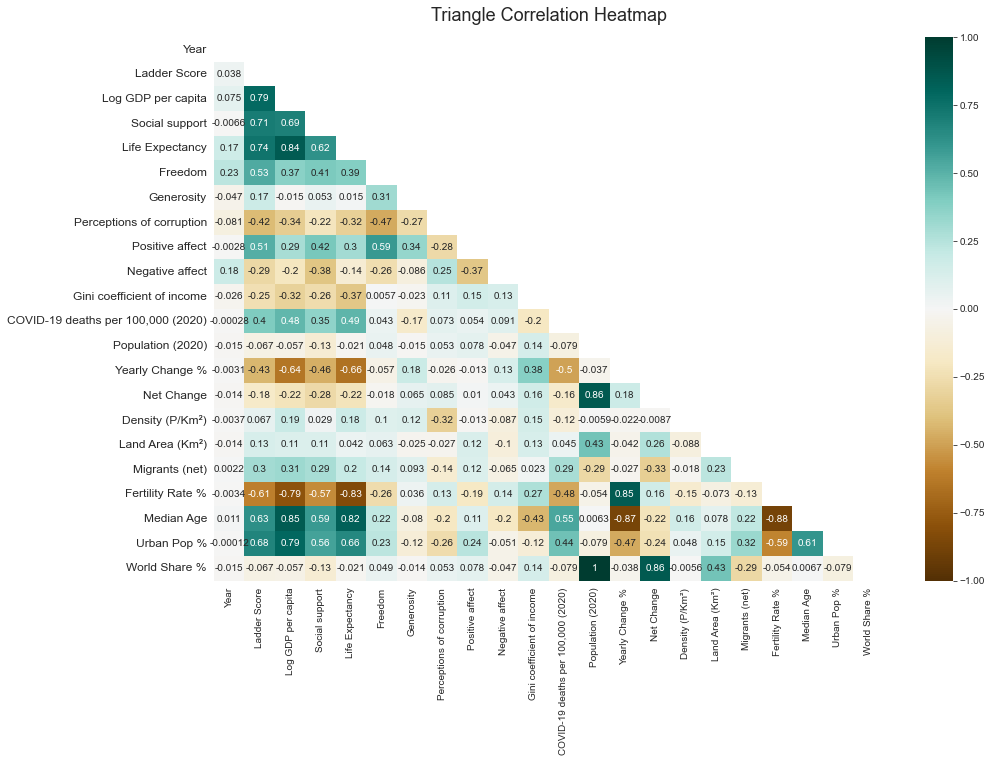

In [49]:
# Triangle Correlation Heatmap
sns.set_style("white")
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(full_report.corr(), dtype=bool))

heatmap = sns.heatmap(full_report.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.yticks(size=12)
plt.show()

The six factors that contribute to happiness tend to be positively correlated to happiness. Respondents were asked questions based on these factors with an answer of 0 or 1 (binary answers). Averages from these 0 or 1 responses were calculated for each factor.

We may notice that Log GDP per capita or life expectancy has the strongest positive correlation to ladder score.
Positive or negative affect are an average of three questions pertaining to either variable. These variables relate to day-to-day feelings of postive or negative emotions, and not surprisingly, they do have some correlation to happiness.

A few other variables that may correlate to happiness include: 
* fertility rate % (population growth rate)
* median age
* Life Expectancy
* urban population percentage
* COVID-19 deaths in 2020
* Freedom
* Social Support


### Data Distribution and Outliers

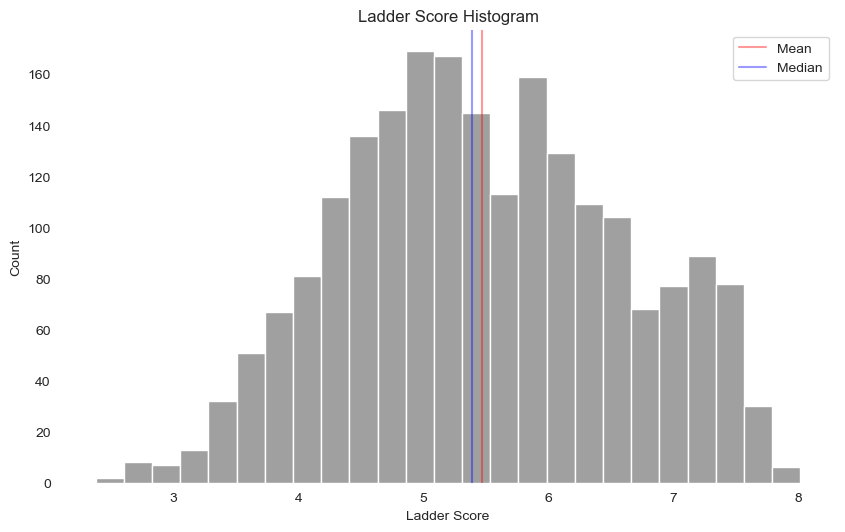

In [50]:
sns.set_style("white")

# Ladder Score distribution
plt.subplots(figsize = (10,6), dpi = 100)
ax = sns.histplot(x="Ladder Score", data=full_report, color="grey", bins=25)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.title("Ladder Score Histogram")
plt.axvline(full_report["Ladder Score"].mean(), color = "red", alpha = 0.4, label = "Mean")
plt.axvline(full_report["Ladder Score"].median(), color = "blue", alpha = 0.4, label = "Median")
plt.legend()
plt.show()

We may notice that the distribution of ladder scores throughout our dataset closely resemble a normal distrubtion. 

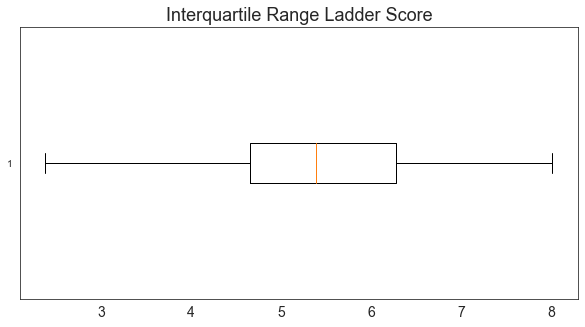

In [51]:
# Check for outliers in ladder score
fig, ax = plt.subplots(figsize = (10,5))
ax = plt.boxplot(full_report["Ladder Score"], vert = False)
plt.title("Interquartile Range Ladder Score", size = 18)
plt.xticks(size = 14)
plt.show()

In [52]:
full_report["Ladder Score"].describe()

count    2098.000000
mean        5.471403
std         1.112682
min         2.375092
25%         4.652504
50%         5.391887
75%         6.282982
max         8.018934
Name: Ladder Score, dtype: float64

In [53]:
# Isolating each region into individual dataframes
eastern_euro = full_report[full_report["Region"] == "Central and Eastern Europe"]
commonwealth = full_report[full_report["Region"] == "Commonwealth of Independent States"]
east_asia = full_report[full_report["Region"] == "East Asia"]
latin_america = full_report[full_report["Region"] == "Latin America and Caribbean"]
middle_east = full_report[full_report["Region"] == "Middle East and North Africa"]
america_anz = full_report[full_report["Region"] == "North America and ANZ"]
south_asia = full_report[full_report["Region"] == "South Asia"]
southeast_asia = full_report[full_report["Region"] == "Southeast Asia"]
africa = full_report[full_report["Region"] == "Sub-Saharan Africa"]
western_euro = full_report[full_report["Region"] == "Western Europe"]

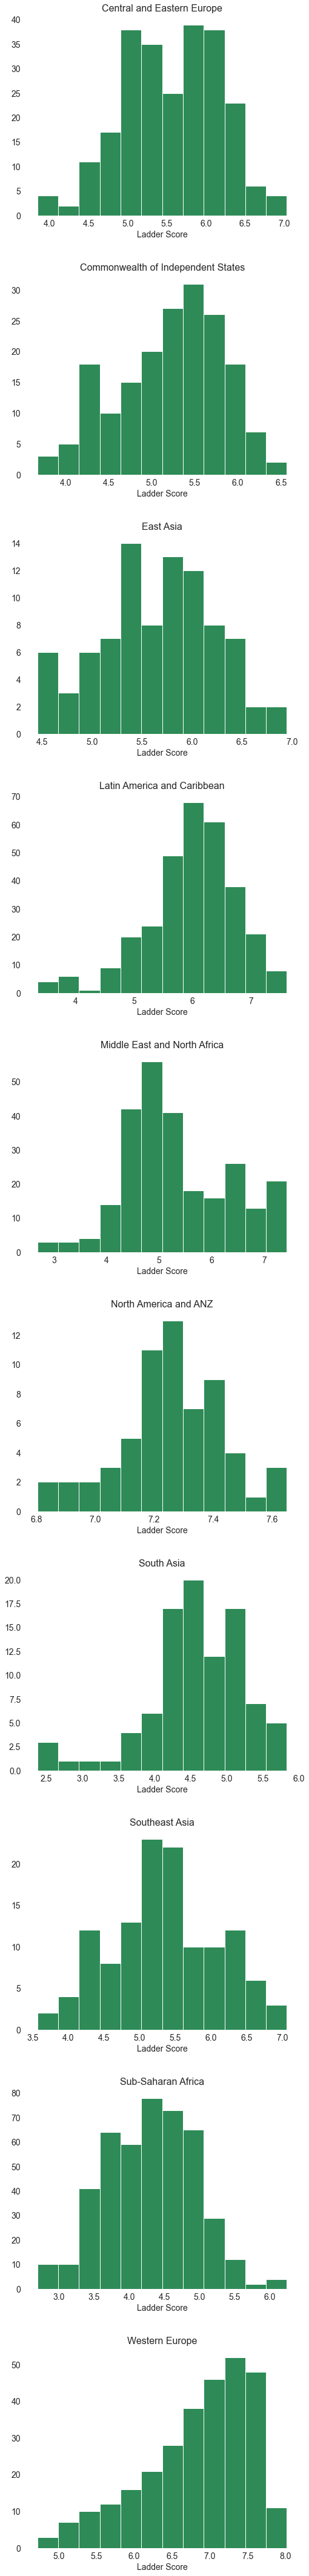

In [54]:
# Histogram for all regions

# Figure and axes assignment
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=10, ncols=1,
                                        figsize=(8,60))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

# Setting axes
for ax in axes:
    ax.set_xlabel("Ladder Score", size = 14)
    ax.tick_params(axis="both", labelsize= 14)
    for location in ["left", "right", "top", "bottom"]:
        ax.spines[location].set_visible(False)
    
       
# Central and Eastern Europe   
ax1.hist(eastern_euro["Ladder Score"], bins = 12, color = "seagreen")
ax1.set_title("Central and Eastern Europe", size = 16)

# Commonwealth of Independent States
ax2.hist(commonwealth["Ladder Score"], bins = 12, color = "seagreen")
ax2.set_title("Commonwealth of Independent States", size = 16)

# East Asia
ax3.hist(east_asia["Ladder Score"], bins = 12, color = "seagreen")
ax3.set_title("East Asia", size = 16)

# Latin America and Caribbean
ax4.hist(latin_america["Ladder Score"], bins = 12, color = "seagreen")
ax4.set_title("Latin America and Caribbean", size = 16)

# Middle East and North Africa
ax5.hist(middle_east["Ladder Score"], bins = 12, color = "seagreen")
ax5.set_title("Middle East and North Africa", size = 16)

# North America and ANZ
ax6.hist(america_anz["Ladder Score"], bins = 12, color = "seagreen")
ax6.set_title("North America and ANZ", size = 16)

# South Asia
ax7.hist(south_asia["Ladder Score"], bins = 12, color = "seagreen")
ax7.set_title("South Asia", size = 16)

# Southeast Asia
ax8.hist(southeast_asia["Ladder Score"], bins = 12, color = "seagreen")
ax8.set_title("Southeast Asia", size = 16)

# Sub-Saharan Africa
ax9.hist(africa["Ladder Score"], bins = 12, color = "seagreen")
ax9.set_title("Sub-Saharan Africa", size = 16)

# Western Europe
ax10.hist(western_euro["Ladder Score"], bins = 12, color = "seagreen")
ax10.set_title("Western Europe", size = 16)

fig.tight_layout(pad=4)
plt.show()

* Ladder scores of North America/Australia have a narrow spread and are centered around 7.3
* The Middle East appears to have a very wide range of scores
* Western Europe is the only region that does not resemble a normal distribution, thus there may be a collection of "less happy" countries compared to the rest of Western Europe
*  Sub-Saharan Africa appears to have a significant amount of countries that are far below world average happiness

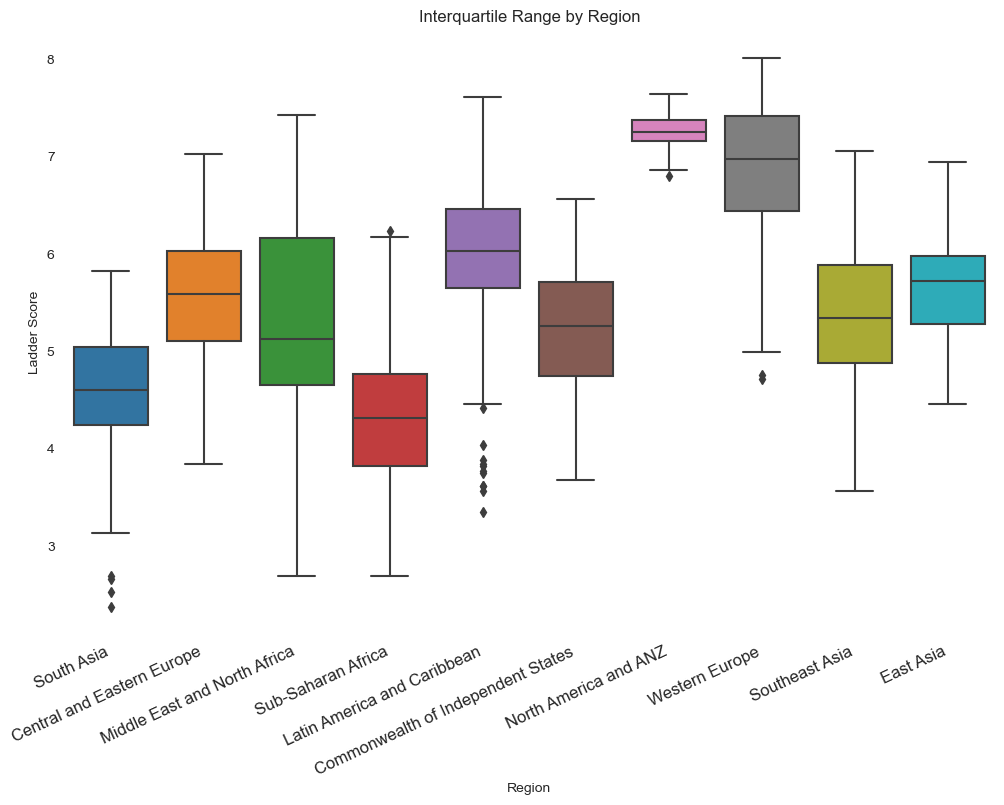

In [55]:
# Regional outliers
fig, ax = plt.subplots(figsize = (12,8), dpi = 100)
ax = sns.boxplot(x="Region", y="Ladder Score", data=full_report, dodge=True, palette= "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(ha="right", rotation=25, size = 12)
plt.title("Interquartile Range by Region")
plt.show()

### Yearly Overview

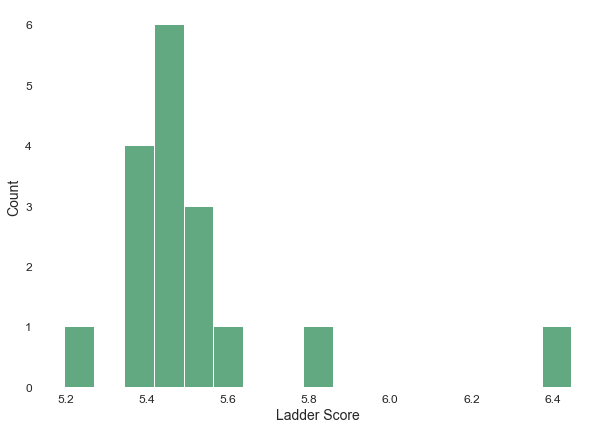

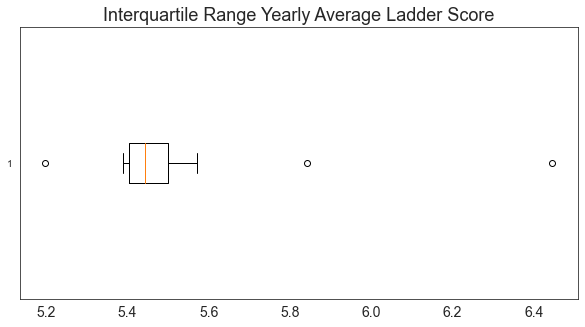

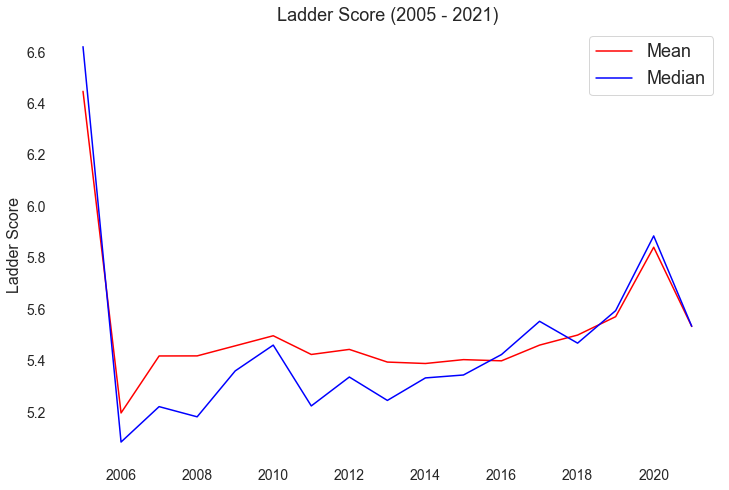

In [56]:
# Histogram yearly average ladder score 
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.histplot(x="Ladder Score", data=year_avg, color="seagreen")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.tick_params(axis="both", labelsize=12)
ax.set_xlabel("Ladder Score", size = 14)
ax.set_ylabel("Count", size = 14)
plt.show()

# Box plot for outliers
fig, ax = plt.subplots(figsize = (10,5))
ax = plt.boxplot(year_avg["Ladder Score"], vert = False)
plt.title("Interquartile Range Yearly Average Ladder Score", size = 18)
plt.xticks(size = 14)
plt.show()

# Mean and median year ladder scores
fig, ax = plt.subplots(figsize = (12,8))
# Plot mean and median
ax.plot(year_avg.index, year_avg["Ladder Score"], color = "red", label="Mean")
ax.plot(year_median.index, year_median["Ladder Score"], color = "blue", label = "Median")
# Remove spines
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
# Set title and labels
ax.set_title("Ladder Score (2005 - 2021)", size = 18)
ax.set_ylabel("Ladder Score", size = 16)
plt.legend(fontsize=18)
ax.tick_params(axis="both", labelsize=14)
plt.show()

In [57]:
full_report[full_report["Year"] == 2005].shape

(27, 24)

In [58]:
full_report[full_report["Year"] == 2005]

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Gini coefficient of income,"COVID-19 deaths per 100,000 (2020)",Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate %,Median Age,Urban Pop %,World Share %
66,Australia,2005,7.340688,10.658608,0.967892,71.400002,0.934973,-0.001023,0.390416,0.842648,0.238012,North America and ANZ,33.00,3.564700,25550683.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33
147,Belgium,2005,7.262290,10.744605,0.934875,69.900002,0.923843,-0.001023,0.597554,0.796279,0.260380,Western Europe,25.60,168.495697,11598451.0,0.44,50295.0,383.0,30280.0,48000.0,1.7,42.0,98.0,0.15
218,Brazil,2005,6.636771,9.438417,0.882923,63.299999,0.882186,-0.001023,0.744994,0.818337,0.301780,Latin America and Caribbean,54.00,91.715103,212821986.0,0.72,1509890.0,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73
293,Canada,2005,7.418048,10.651751,0.961552,71.300003,0.957306,0.256230,0.502681,0.838544,0.233278,North America and ANZ,35.25,41.417900,37799407.0,0.89,331107.0,4.0,9093510.0,242032.0,1.5,41.0,81.0,0.48
437,Czech Republic,2005,6.439257,10.324370,0.918759,67.000000,0.865235,-0.001023,0.900733,0.722875,0.257949,Central and Eastern Europe,24.00,108.133499,10712481.0,0.18,19772.0,139.0,77240.0,22011.0,1.6,43.0,74.0,0.14
449,Denmark,2005,8.018934,10.851397,0.972372,69.599998,0.971135,-0.001023,0.236522,0.859549,0.153672,Western Europe,27.80,22.409399,5795780.0,0.35,20326.0,137.0,42430.0,15200.0,1.8,42.0,88.0,0.07
498,Egypt,2005,5.167754,9.035634,0.847842,59.700001,0.817362,-0.001023,0.745639,0.734863,0.345555,Middle East and North Africa,31.56,7.456900,102659126.0,1.94,1946331.0,103.0,995450.0,-38033.0,3.3,25.0,43.0,1.31
564,France,2005,7.093393,10.641690,0.940338,71.300003,0.894819,-0.001023,0.687851,0.768988,0.225094,Western Europe,29.30,99.211800,65298930.0,0.22,143783.0,119.0,547557.0,36527.0,1.9,42.0,82.0,0.84
606,Germany,2005,6.619550,10.689224,0.963490,70.199997,0.846624,-0.001023,0.781007,0.775692,0.197262,Western Europe,31.10,40.331100,83830972.0,0.32,266897.0,240.0,348560.0,543822.0,1.6,46.0,76.0,1.07
636,Greece,2005,6.006310,10.461699,0.836539,70.500000,0.734172,-0.001023,0.860563,0.691998,0.263643,Western Europe,32.30,46.416298,10413936.0,-0.48,-50401.0,81.0,128900.0,-16000.0,1.3,46.0,85.0,0.13


There are only 27 entries in year 2005, and a majority of the countries surveyed in that year have above average scores in happiness. In the graph above that displays median and mean ladder scores by year we see a large dip from 2005 to 2006 caused by a skewness in data.

In [59]:
# Re-assign dataframes that excluding Year 2005 to new variables for line plotting
report_2006 = full_report[full_report["Year"] > 2005].copy()
year_avg_2006 = report_2006.groupby("Year").mean().copy()
year_median_2006 = report_2006.groupby("Year").median().copy()

In [60]:
report_2006.describe()

,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Gini coefficient of income,"COVID-19 deaths per 100,000 (2020)",Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate %,Median Age,Urban Pop %,World Share %
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2055.000000,2044.000000,1.996000e+03,1996.000000,1.996000e+03,1996.000000,1.996000e+03,1996.000000,1996.000000,1996.000000,1943.000000,1996.000000
mean,2013.883148,5.458695,9.367412,0.811605,63.550909,0.745093,-0.001148,0.745999,0.709514,0.268713,37.495237,34.024448,5.682031e+07,1.113943,5.462149e+05,259.148297,8.934212e+05,4439.149299,2.553407,31.630762,61.482759,0.727811
std,4.401675,1.109524,1.153257,0.117823,7.437015,0.139840,0.158869,0.181205,0.102757,0.081969,8.184827,39.461274,1.811525e+08,1.082694,1.462557e+06,907.136324,2.199517e+06,149658.159685,1.238636,9.184952,21.076795,2.321255
min,2006.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737,23.200000,0.000000,3.416280e+05,-1.350000,-3.838400e+05,2.000000,3.000000e+02,-653249.000000,1.100000,15.000000,14.000000,0.000000
25%,2010.000000,4.639863,8.461434,0.748446,58.900002,0.653310,-0.110535,0.698064,0.634944,0.210127,31.930000,1.834500,5.795780e+06,0.220000,1.800200e+04,36.000000,6.267400e+04,-20000.000000,1.700000,24.000000,46.000000,0.070000
50%,2014.000000,5.385373,9.461148,0.832078,65.320000,0.762963,-0.020043,0.793246,0.709998,0.268448,36.000000,17.263000,1.319128e+07,1.060000,1.200900e+05,87.000000,2.275400e+05,-1387.000000,2.100000,31.000000,63.000000,0.170000
75%,2018.000000,6.260993,10.354605,0.904253,68.699997,0.856917,0.085128,0.866092,0.791706,0.312898,43.615000,62.794899,4.037277e+07,1.850000,5.066350e+05,156.500000,7.433900e+05,21200.000000,3.000000,40.000000,79.000000,0.520000
max,2021.000000,7.970892,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590,65.426000,168.495697,1.440298e+09,3.840000,1.358663e+07,8358.000000,1.637687e+07,954806.000000,7.000000,48.000000,98.000000,18.470000


In [61]:
full_report.describe()

,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Gini coefficient of income,"COVID-19 deaths per 100,000 (2020)",Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate %,Median Age,Urban Pop %,World Share %
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2082.000000,2071.000000,2.023000e+03,2023.000000,2.023000e+03,2023.000000,2.023000e+03,2023.000000,2023.000000,2023.000000,1969.000000,2023.000000
mean,2013.768827,5.471403,9.377080,0.812709,63.595392,0.746101,-0.001023,0.745639,0.709998,0.268552,37.448075,34.379829,5.683399e+07,1.105517,5.451305e+05,257.842313,9.002903e+05,4829.850222,2.544834,31.713791,61.694769,0.727983
std,4.486449,1.112682,1.151502,0.117835,7.416574,0.139696,0.157943,0.181316,0.102646,0.081756,8.178469,39.645855,1.800628e+08,1.081100,1.456818e+06,901.314916,2.205107e+06,150426.182038,1.234251,9.191105,21.084392,2.307288
min,2005.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737,23.200000,0.000000,3.416280e+05,-1.350000,-3.838400e+05,2.000000,3.000000e+02,-653249.000000,1.100000,15.000000,14.000000,0.000000
25%,2010.000000,4.652504,8.472385,0.750398,59.000000,0.654270,-0.108783,0.697552,0.636139,0.210371,31.930000,1.834500,5.795780e+06,0.220000,1.800200e+04,36.000000,6.271000e+04,-20000.000000,1.700000,24.000000,47.000000,0.070000
50%,2014.000000,5.391887,9.470156,0.833590,65.360001,0.764010,-0.017122,0.792864,0.709998,0.267971,36.000000,17.263000,1.489977e+07,1.060000,1.198730e+05,87.000000,2.301700e+05,-1387.000000,2.100000,31.000000,63.000000,0.190000
75%,2018.000000,6.282982,10.368813,0.904935,68.799988,0.857776,0.083839,0.866178,0.792543,0.312485,43.520000,65.747200,4.368658e+07,1.850000,5.120650e+05,167.000000,7.433900e+05,21200.000000,3.000000,40.000000,80.000000,0.560000
max,2021.000000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590,65.426000,168.495697,1.440298e+09,3.840000,1.358663e+07,8358.000000,1.637687e+07,954806.000000,7.000000,48.000000,98.000000,18.470000


Excluding Year 2005, the data does not make a significant change. Most variables remain relatively unchanged, therefore we it's safe to assume that including year 2005 in further analysis is acceptable, because the inclusion of this year does not skew the analysis by a large degree.

In [62]:
# Standard scaling six factors contributing to ladder score (happiness)

from sklearn.preprocessing import StandardScaler

# New dataframe for scaling
scaled_years = year_avg_2006[["Log GDP per capita","Social support","Life Expectancy","Freedom","Generosity","Perceptions of corruption"]].copy()

# Scale variables
std_scaler = StandardScaler()
year_avg_scaled = std_scaler.fit_transform(scaled_years.to_numpy())

# Columns to use
cols_scaled = [
                "Log GDP per capita",
                "Social support",
                "Life Expectancy",
                "Freedom",
                "Generosity",
                "Perceptions of corruption"
              ]

# Scale columns, converts to dataframe with appropriate indices
year_avg_scaled = pd.DataFrame(year_avg_scaled, index = year_avg_2006.index, columns=cols_scaled)

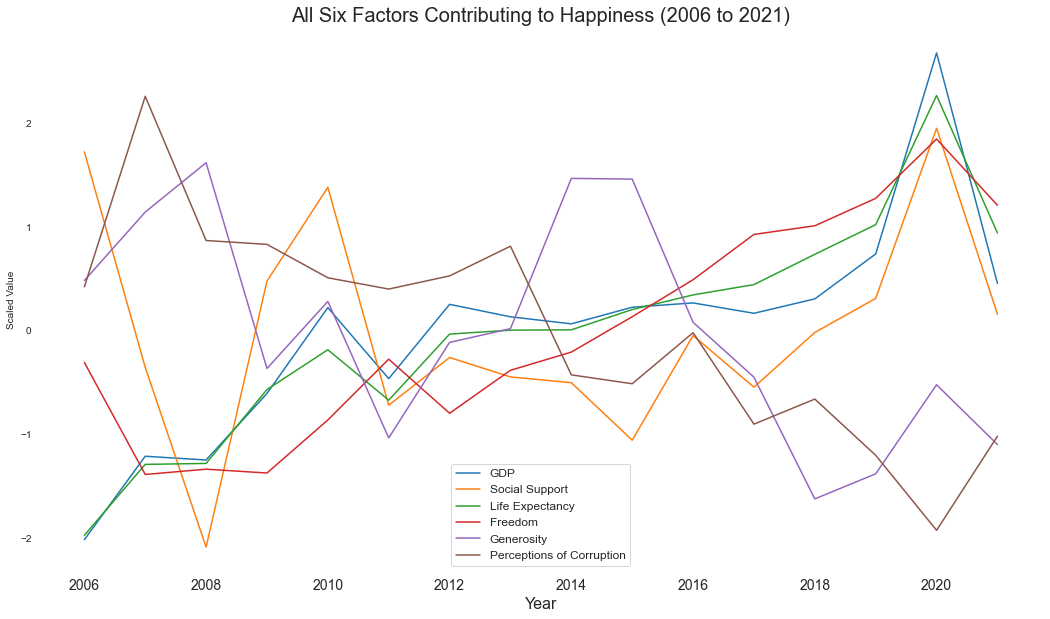

In [63]:
# Contributing factors 2006 to 2021
fig, ax = plt.subplots(figsize = (18, 10))
plt.plot(year_avg_scaled.index, year_avg_scaled["Log GDP per capita"], label = "GDP")
plt.plot(year_avg_scaled.index, year_avg_scaled["Social support"], label = "Social Support")
plt.plot(year_avg_scaled.index, year_avg_scaled["Life Expectancy"], label = "Life Expectancy")
plt.plot(year_avg_scaled.index, year_avg_scaled["Freedom"], label = "Freedom")
plt.plot(year_avg_scaled.index, year_avg_scaled["Generosity"], label = "Generosity")
plt.plot(year_avg_scaled.index, year_avg_scaled["Perceptions of corruption"], label = "Perceptions of Corruption")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xlabel("Year", size = 16)
plt.ylabel("Scaled Value")
plt.xticks(size = 14)
plt.title("All Six Factors Contributing to Happiness (2006 to 2021)", size = 20)
plt.legend(fontsize=12, title_fontsize=13)
plt.show()

Excluding year 2005 (skewed by a small number of countries), happiness appears to be on slight upward trend with a dramatic decrease after 2020.
Nearly every contributing factor can be observed following a similar trend, however they tend to vary more (especially social support and generosity).
Every factor except for `Perceptions of Corruption` increases around 2019, and follows a severe decrase. It may appear that respondents answered that they felt there was more government/business corruption in 2021.

As respondents answered more often with 1 (yes) instead of 0 (no) to the factors that influence or contribute to happiness in their lives, we would expect to see higher averages. Thus changes in our line plot indicate positive or negative changes in the averages. 

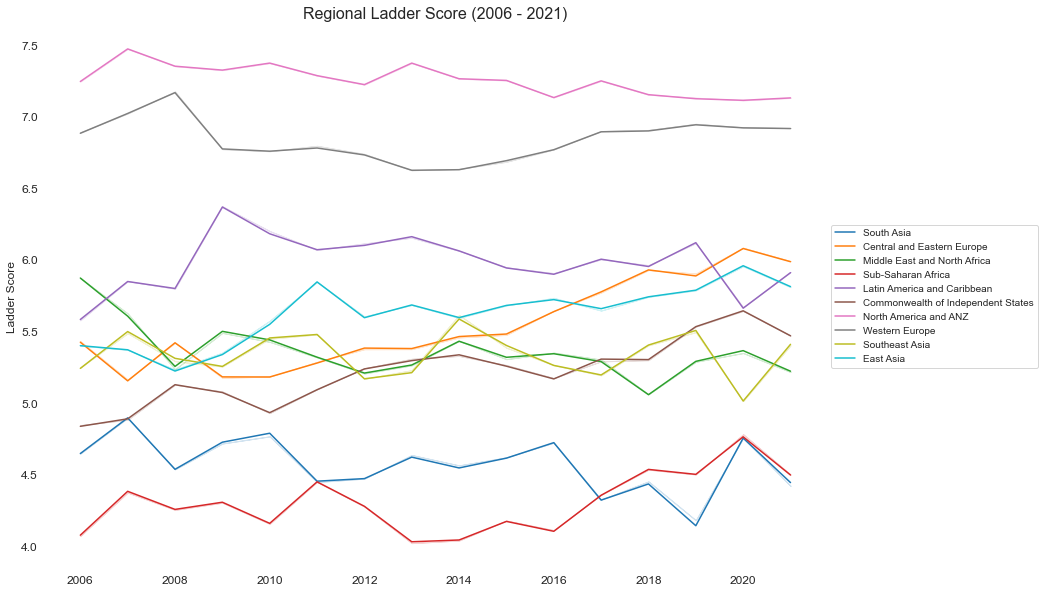

In [64]:
# Regional yearly mean and median
fig, ax = plt.subplots(figsize = (14,10))
ax = sns.lineplot(x = "Year", y = "Ladder Score", hue = "Region", data = report_2006, ci=False, palette= "tab10")
ax.set_title("Regional Ladder Score (2006 - 2021)", size = 16)

# Remove spines
plt.legend(loc="center left",bbox_to_anchor=(1.0, 0.5))
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.set_xlabel("")
plt.xticks(size = 12)
ax.set_ylabel("Ladder Score", size = 12)
plt.yticks(size = 12)
plt.show()

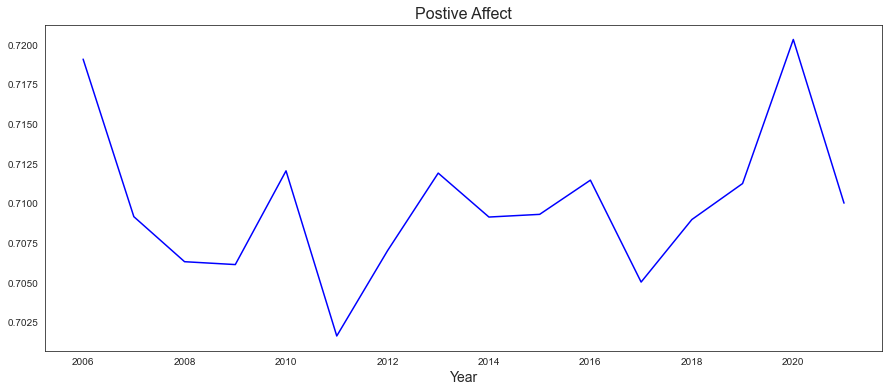

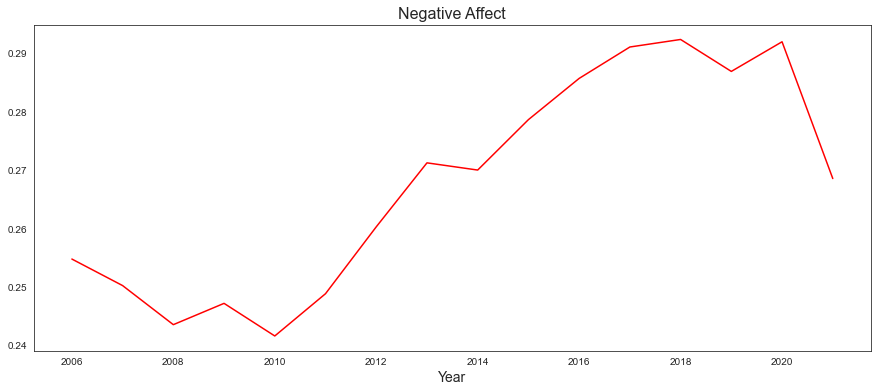

In [65]:
# Positive affect
fig, ax = plt.subplots(figsize = (15, 6))
plt.title("Postive Affect", size = 16)
plt.plot(year_avg.loc[2006:]["Positive affect"], color = "blue")
plt.xlabel("Year", size = 14)
plt.show()

# Negative affect
fig, ax = plt.subplots(figsize = (15, 6))
plt.title("Negative Affect", size = 16)
plt.plot(year_avg.loc[2006:]["Negative affect"], color = "red")
plt.xlabel("Year", size = 14)
plt.show()

Respondents were asked a series of three questions pertaining to positive and negative feelings on a daily basis. 
* Positive affect: happiness, laughter and enjoyment
* Negative affect: worry, sadness and anger

The values in this dataset for these variables are an average 0 or 1 (binary answers) of these three questions.
We can think of these numbers as percentages, for example a value of 0.7 for positive affect would indicate that 70% of respondents answered yes (1) that they had positive feelings of happiness, laughter, or enjoyment most of the time during the day.

In a detailed view we may see that positive affect varies over time; the values generally shift from 0.72 to 0.70, but drastically spike in 2020 and then decrease.
We see that negative affect has a much lower average. Generally most people probably maintain a somewhat positive mood daily. 
What is interesting is that the answers from respondents shows how negative emotions gradually increase since 2010, but drop drastically in 2020 onward.

Is it possible that respondents simply answered no to both questions? Nothing in the appendix stated rules for answering these questions other than if individuals had felt these emotions regularly. Have people felt more neutral, neither happy nor sad since 2020? Unfortunately this dataset doesn't have all the information for us to answer this question, but what we can notice is that happiness (and its contributing factors) increased up to 2020 and decreased afterward. 



### Country and Regional Happiness

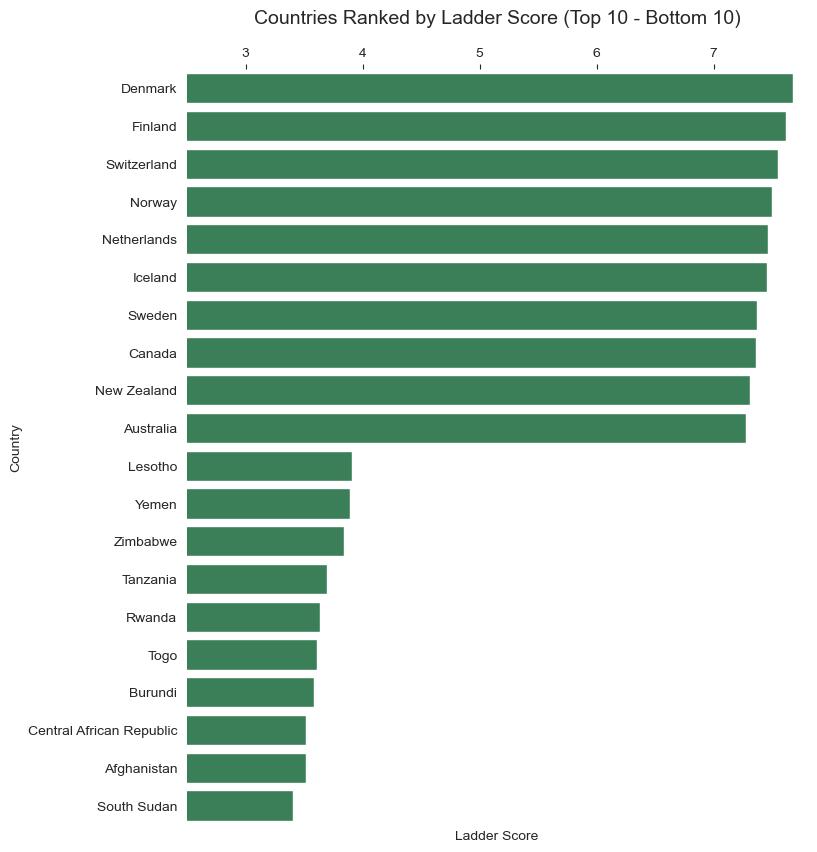

In [66]:
# Highest and lowest ladder scores by country
bottom_10 = country_group.nsmallest(10,"Ladder Score").sort_values(by="Ladder Score", ascending=False)
top_10 = country_group.nlargest(10,"Ladder Score")
high_low = top_10.append(bottom_10, ignore_index=False)

# Plot results
fig, ax = plt.subplots(figsize = (8,10), dpi = 100)
sns.barplot(x="Ladder Score", y="Country", data=high_low, color="seagreen")
plt.title("Countries Ranked by Ladder Score (Top 10 - Bottom 10)", size = 14, y = 1.05)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xlim(2.5,7.8)
ax.xaxis.tick_top()
plt.show()

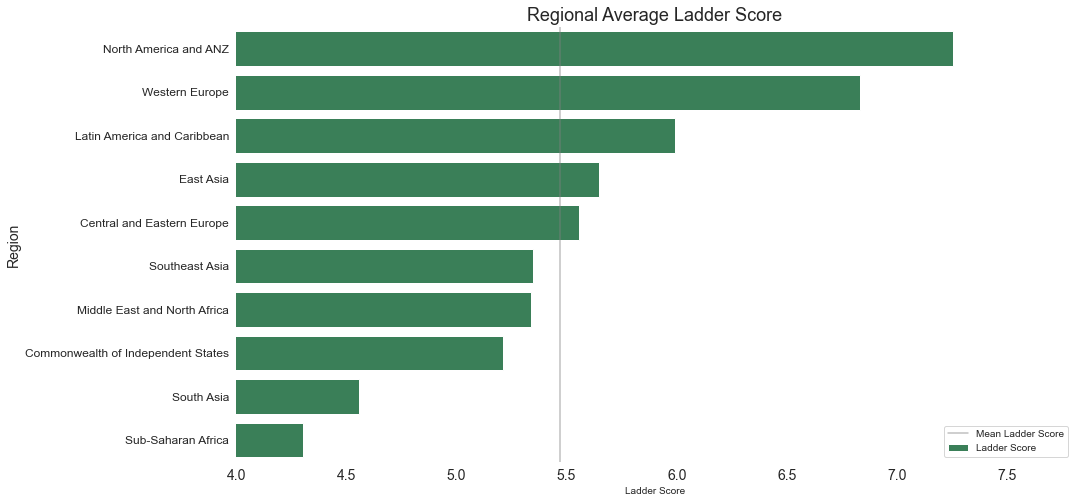

In [67]:
# Regional average ladder Score
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x="Ladder Score", y="Region", data = region_group.sort_values(by="Ladder Score", ascending = False), color="seagreen", label = "Ladder Score")
plt.title("Regional Average Ladder Score", size = 18)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.axvline(full_report["Ladder Score"].mean(), color = "grey", alpha = 0.5, label = "Mean Ladder Score")
plt.xlim(4,7.8)
ax.set_ylabel("Region", size = 14)
ax.tick_params(axis="both", labelsize=14)
plt.yticks(size = 12)
plt.legend()
plt.show()

Region names except for "Commonwealth of Independent States" are fairly self-explanatory. We can use `.get_group()` combined with `.unique()` to see an array of all countries in that region.

In [68]:
# Commonwealh of Independent States
full_report.groupby("Region").get_group("Commonwealth of Independent States")["Country"].unique()

array(['Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan',
       'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan',
       'Ukraine', 'Uzbekistan'], dtype=object)

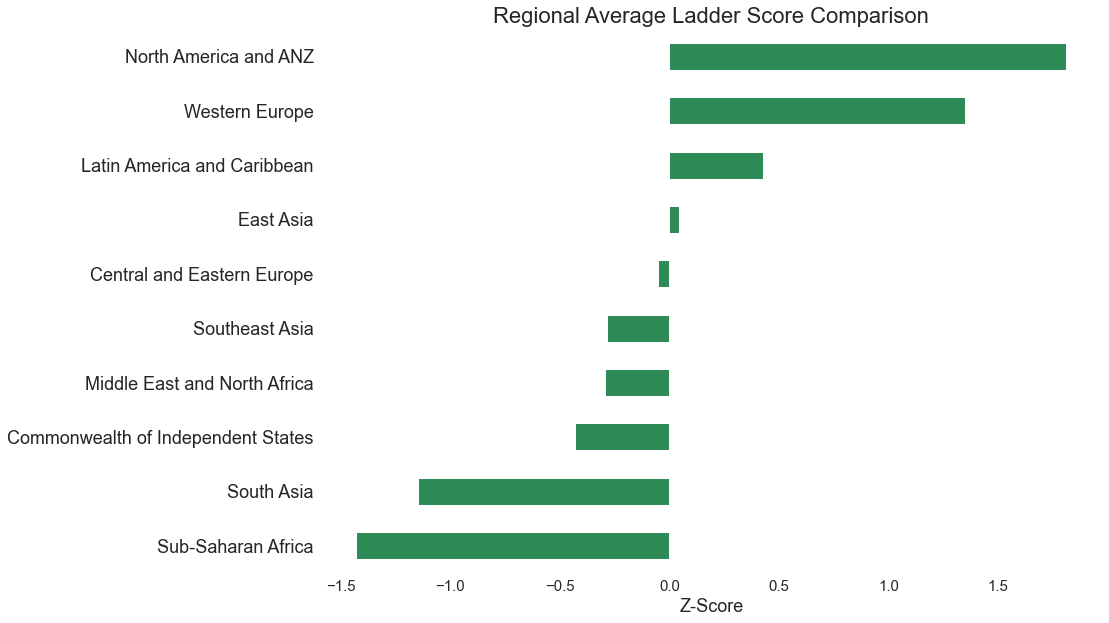

In [69]:
# Regional standard scores
# Lambda function calculates: 
# each region ladder score - dataframe ladder score mean / dataframe standard deviation
ax = region_group.set_index("Region")["Ladder Score"]\
                                                .transform(lambda x: (x- x.mean()) / x.std()).sort_values()\
                                                .plot(kind="barh",figsize=(14,10), color="seagreen")

plt.xticks(size=15)                
plt.yticks(size=18)
plt.ylabel("")
plt.xlabel("Z-Score", size=18)                           
plt.title("Regional Average Ladder Score Comparison", size=22)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)

The Z-Score plot above indicates the distance of each region from the average happiness score of all countries surveyed.  Since the ladder score follows a normal distribution we are able to use the z-score to calculate each region's distance from the overall average. Therfore, the higher the z-score, the greater the distance from the average.


European countries (particularly Northern European nations) score the highest on overall happiness, whereas the majority of the ten lowest happiest countries are located in Sub-Saharan Africa. 
Interesting to note that eventhough Western European countries are the "happiest", North America has the highest average ladder score, with Western Europe in second. Western Europe appears to have a more left skewed distribution, there are likely quite a few countries in that region that skew the data towards a lower average.
North America has a narrower distribution of values that indicates that there are fewer countries present in this region, but their ladder scores are very close to the average.

Other noteworthy observations:
* The region of the middle east and north africa has the greatest distribution of ladder scores from around 2.5 to 7.5
* At first glance, Latin America appears to have the greatest number of outliers, all of them being below 25 %
* East Asia and Central/Eastern Europe have regional ladder scores closest to the average ladder score (they could be considered the "most average" in happiness)

### Socioeconomics, Health, and Happiness

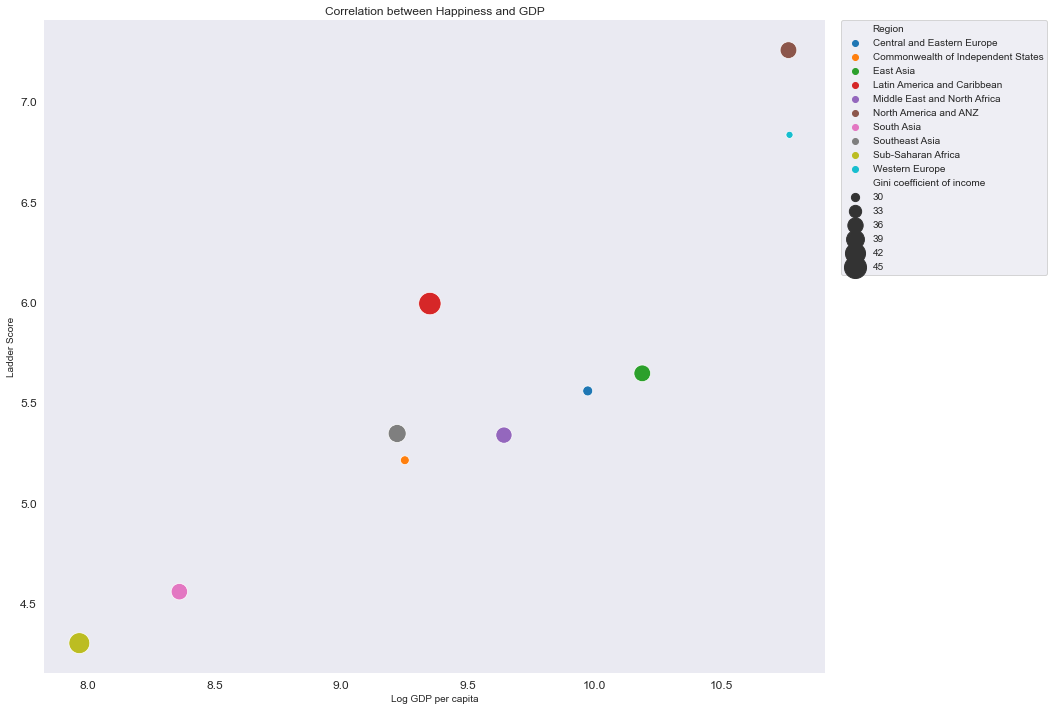

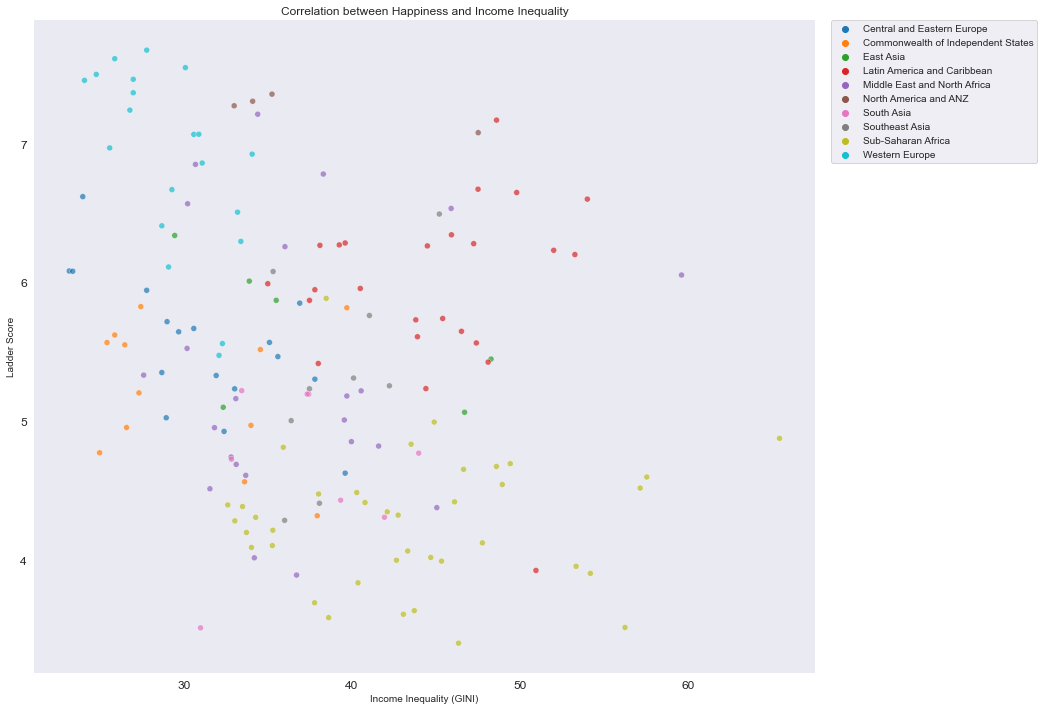

In [70]:
sns.set_style("dark")

# GDP and ladder score correlation

fig, ax = plt.subplots(figsize = (14,12))
ax = sns.scatterplot(x="Log GDP per capita", y="Ladder Score", hue="Region", data=region_group, size="Gini coefficient of income", sizes=(50,500), palette = "tab10")
plt.title("Correlation between Happiness and GDP")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

# Multi index dataframe grouped by region and country
country_region = full_report.groupby(["Region","Country"]).mean()

# Income inequality and ladder score correlation
fig, ax = plt.subplots(figsize = (14,12))
ax = sns.scatterplot(x="Gini coefficient of income", y="Ladder Score", hue="Region", data=country_region, sizes=(50,500), alpha = 0.7, palette = "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.title("Correlation between Happiness and Income Inequality")
plt.xlabel("Income Inequality (GINI)")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


* In the first graph we may notice at least 3 different clusters or groups of regions. 
* At the top right corner lies NA/ANZ and Western Europe with the highest average ladder score and highest GDP per capita. 
* The center cluster of regions have a more average score and GDP
* South Asia and Sub-Saharan Africa may be considered to be the "least happiest" with the lowest Log GDP per capita

The correlation between happiness and GDP may show that Latin America scores above average on happiness, but their income inequality is quite significant.

Generally, it could be considered that income inequality may not have a large impact on a country's happiness, with other factors possibly contributing more to a population's overall happiness.

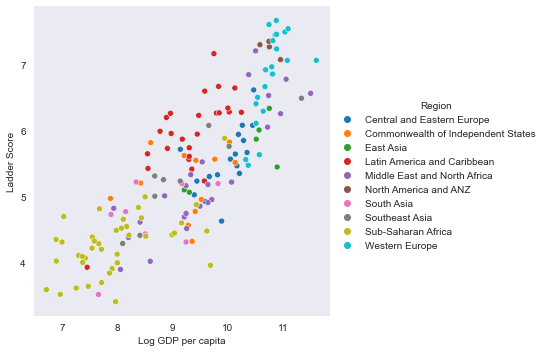

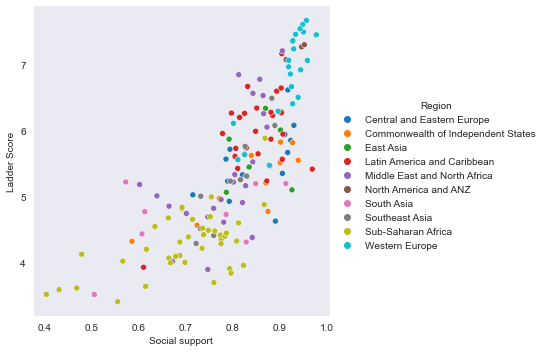

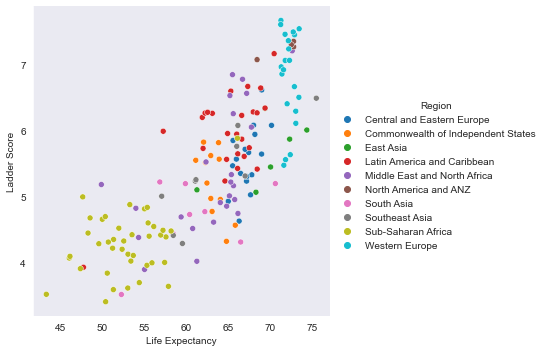

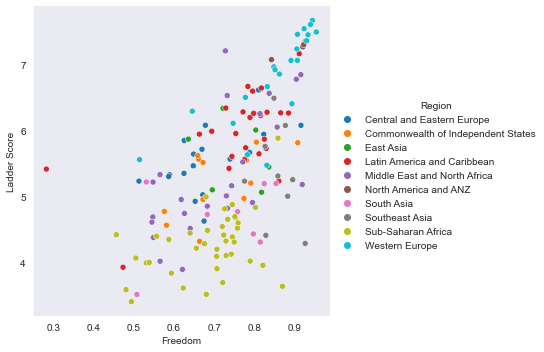

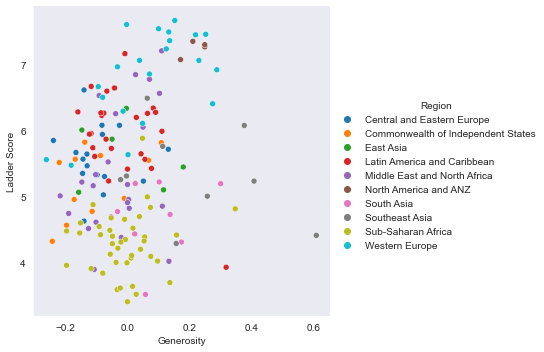

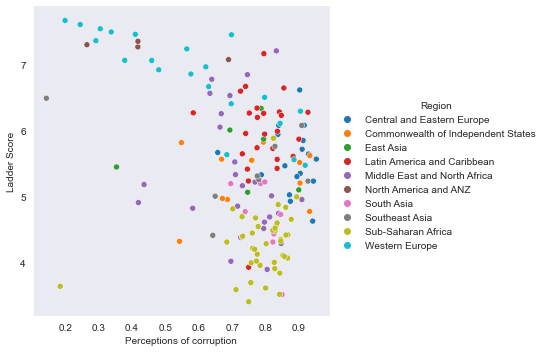

In [71]:
# Factors that contribute to happiness
# Seaborn relational plot to graph results

for col in country_region[["Log GDP per capita", "Social support", "Life Expectancy",
        "Freedom", "Generosity",
        "Perceptions of corruption"]]:
        
        sns.relplot(
                    data = country_region,
                    x= col, y= "Ladder Score", # Compares each variable to ladder score
                    hue= "Region", palette="tab10"
                   )

### Life Expectancy and Median Age

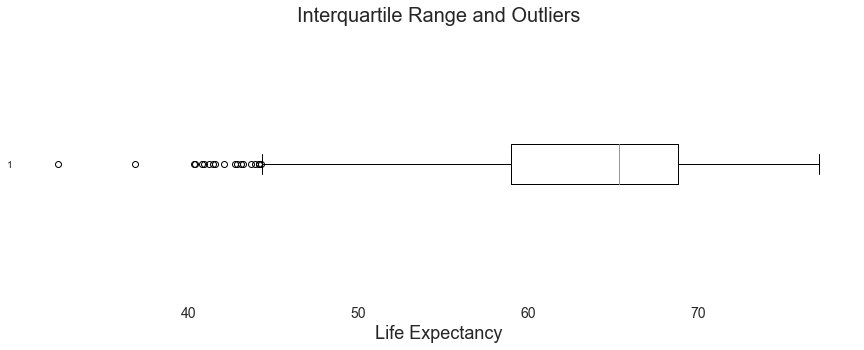

In [72]:
# Life expectancy
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,5))
ax = plt.boxplot(full_report["Life Expectancy"], vert=False)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xlabel("Life Expectancy", size = 18)
plt.title("Interquartile Range and Outliers", size = 20)
plt.xticks(size = 14)
plt.show()

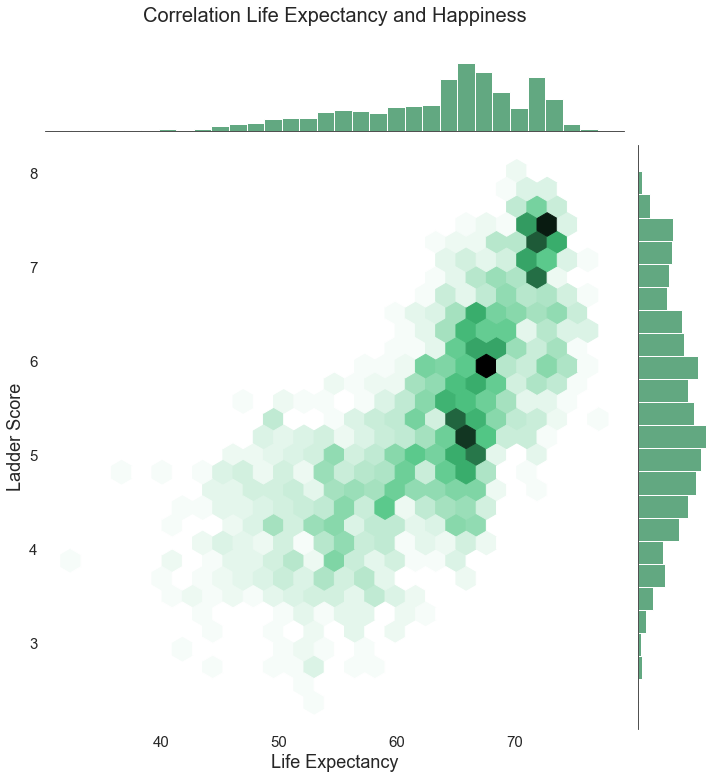

In [73]:
# Happiness and Life Expectancy
sns.jointplot(x="Life Expectancy",y="Ladder Score", data=full_report, kind="hex", height=10, ratio=7, color="seagreen")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(size=15)
plt.xlabel("Life Expectancy" , size=18)
plt.yticks(size=15)
plt.ylabel("Ladder Score", size=18)
plt.title("Correlation Life Expectancy and Happiness", x = 0.5, y = 1.2, size = 20)
plt.show()


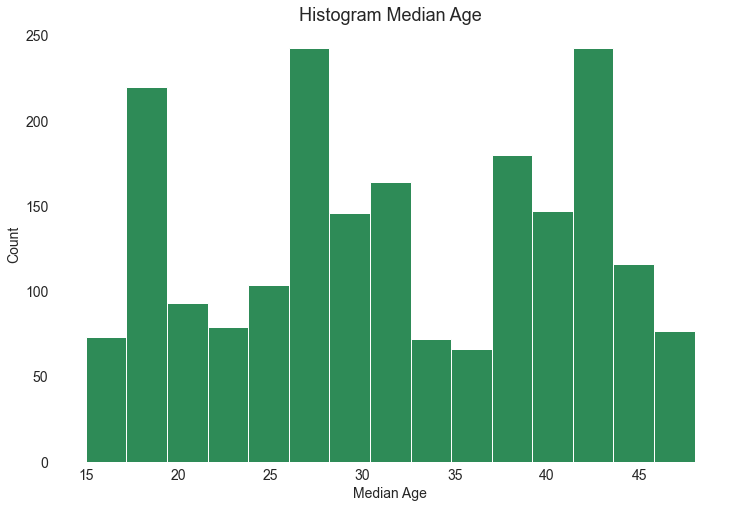

In [74]:
# Median age histogram
plt.figure(figsize=(12,8))
plt.hist(full_report["Median Age"], bins = 15, color="seagreen")
plt.xticks(size=14)
plt.xlabel("Median Age", size = 14)
plt.yticks(size=14)
plt.ylabel("Count", size=14)
plt.title("Histogram Median Age", size = 18)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.show()


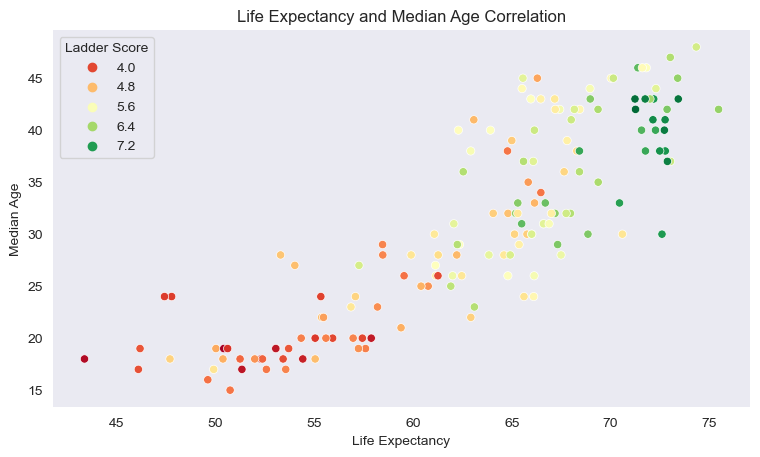

In [75]:
# Correlations between life expectancy and median age
sns.set_style("dark")
fig, bar = plt.subplots(figsize = (9,5), dpi = 100)
sns.scatterplot(x="Life Expectancy", y="Median Age", hue="Ladder Score", data = country_group, palette="RdYlGn")
plt.title("Life Expectancy and Median Age Correlation")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.show()

### Inferences thus far
* `Ladder Score` has a fairly normal distribution of observations
* Western Europe, North America and Australia/NZ have the highest average ladder scores
* Sub-Saharan Africa and South Asia are the "least happiest" among all regions
* Income inequality throughout every region and country varies, and the correlation between it and happiness is rather weak
* Countries and Regions appear to be more affected by Life Expectancy and GDP
* Typically, countries with an older, longer lived population are more happy

World Happiness Report 2021 Appendix 1: *https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf*

"Corruption Perception: The measure is the national average of the survey re-
sponses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses."

* Generally most nations received an average of 0.7 to 0.9 regardless of ladder score
* However, we do see a few middle-east countries, several western european countries and most NA/ANZ nations with a high ladder score and a low perception of corruption
* Corruption does affect the population of a country, but it is not as strong as factors such as income, health, freedom, or social support (having someone to count on in times of trouble)




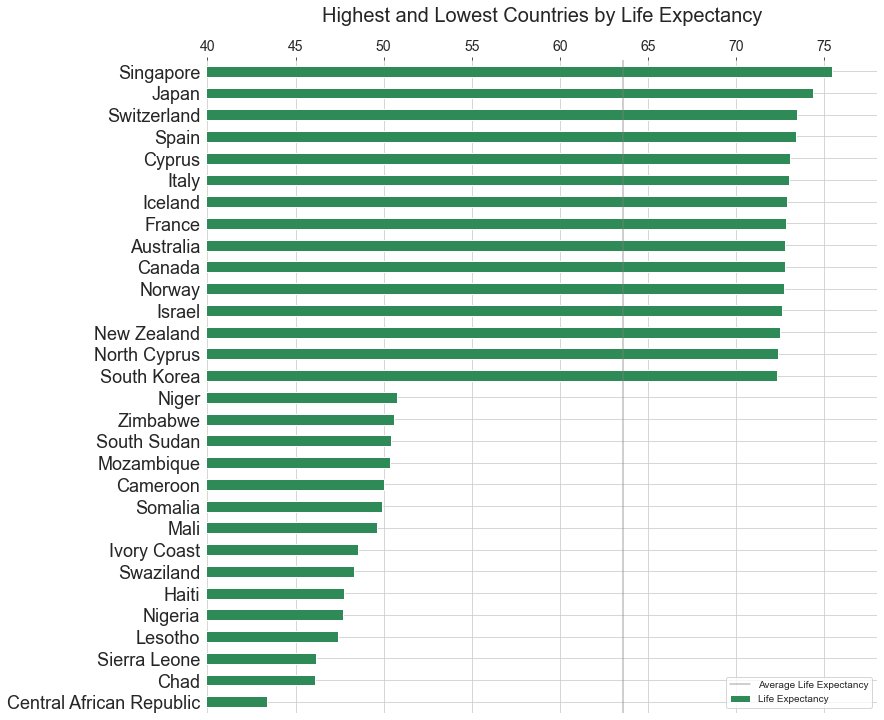

In [76]:
sns.set_style("whitegrid")
# Constructs groupby object by country, calculates mean life expectancy, filters top 15 values and rounds to two decimal points
highest_life_expectancy = np.round(full_report.groupby("Country")["Life Expectancy"].mean().nlargest(15), decimals = 2)
# Constructs groupby object by country, calculates mean life expectancy, filters lowest 15 values and rounds to two decimal points
lowest_life_expectancy = np.round(full_report.groupby("Country")["Life Expectancy"].mean().nsmallest(15), decimals = 2).sort_values(ascending = False)

# Appends highest and lowest life expectancy series into one series
life_expectancy_series = highest_life_expectancy.append(lowest_life_expectancy, ignore_index=False)

# Life expectancy by country
ax = life_expectancy_series.sort_values(ascending=True).plot(kind="barh", xlim=(40,78), figsize=(12,12), color="seagreen" )
plt.ylabel("")
plt.yticks(size=18)
plt.title("Highest and Lowest Countries by Life Expectancy", size=20, y = 1.05)
plt.axvline(full_report["Life Expectancy"].mean(), color = "grey", alpha = 0.5, label = "Average Life Expectancy")
# Removes spines
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.tick_params(axis="x", labelsize=14)
ax.xaxis.tick_top()
plt.legend()
plt.show()

In [77]:
country_group.head()

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Gini coefficient of income,"COVID-19 deaths per 100,000 (2020)",Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate %,Median Age,Urban Pop %,World Share %
0,Afghanistan,2014.076923,3.512188,7.654218,0.504734,52.284047,0.507530,0.056831,0.849518,0.561096,0.322212,31.000000,5.628300,39074280.0,2.33,886592.0,60.0,652860.0,-62920.0,4.6,18.0,25.0,0.50
1,Albania,2014.428571,5.026425,9.394118,0.714965,67.649956,0.671573,-0.078863,0.871621,0.657808,0.297072,28.960000,41.038300,2877239.0,-0.11,-3120.0,105.0,27400.0,-14000.0,1.6,36.0,63.0,0.04
2,Algeria,2015.333333,5.333871,9.330394,0.804414,65.369395,0.565108,-0.103863,0.709820,0.630956,0.263616,27.620000,6.284900,43984569.0,1.85,797990.0,18.0,2381740.0,-10000.0,3.1,29.0,73.0,0.56
3,Angola,2012.500000,4.420299,8.989725,0.737973,53.550000,0.455957,-0.088023,0.867018,0.613339,0.351173,46.102857,1.232300,33032075.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42
4,Argentina,2013.500000,6.286362,10.029353,0.903992,67.968760,0.772018,-0.161061,0.841494,0.825736,0.283053,39.600000,95.683701,45267449.0,0.93,415097.0,17.0,2736690.0,4800.0,2.3,32.0,93.0,0.58


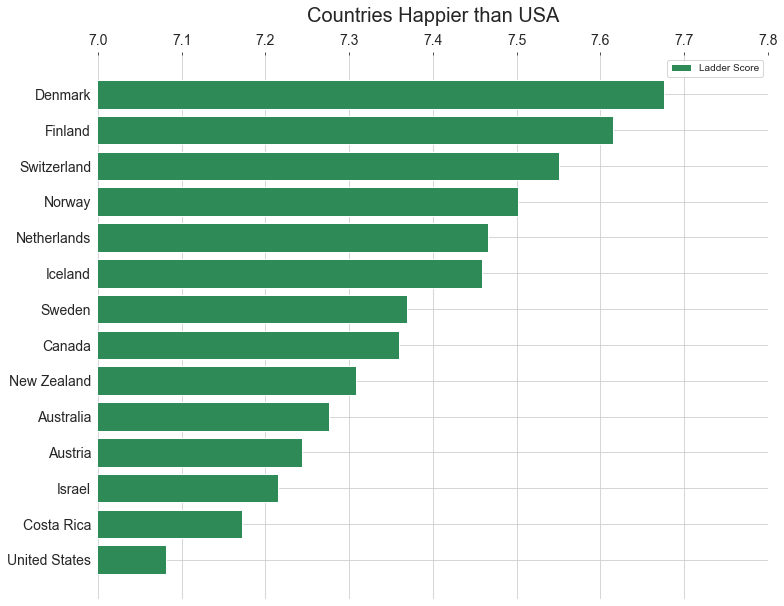

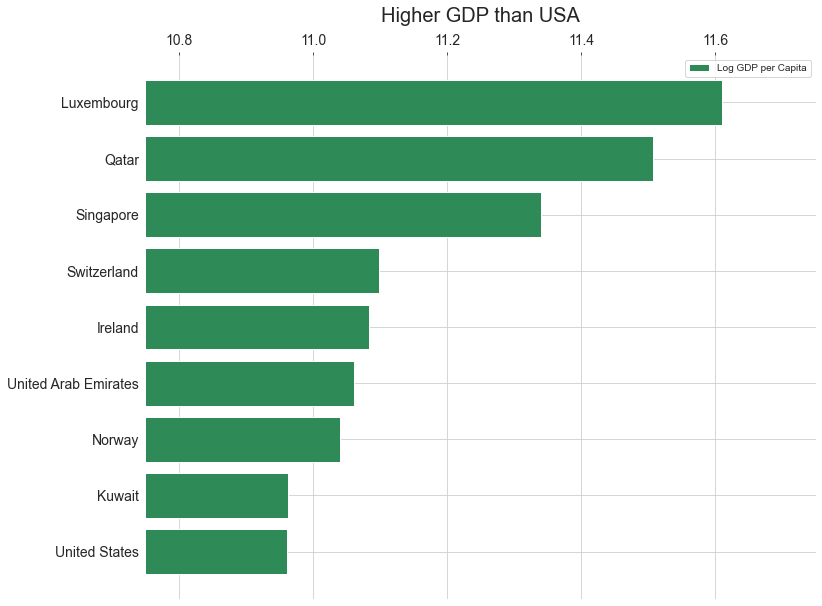

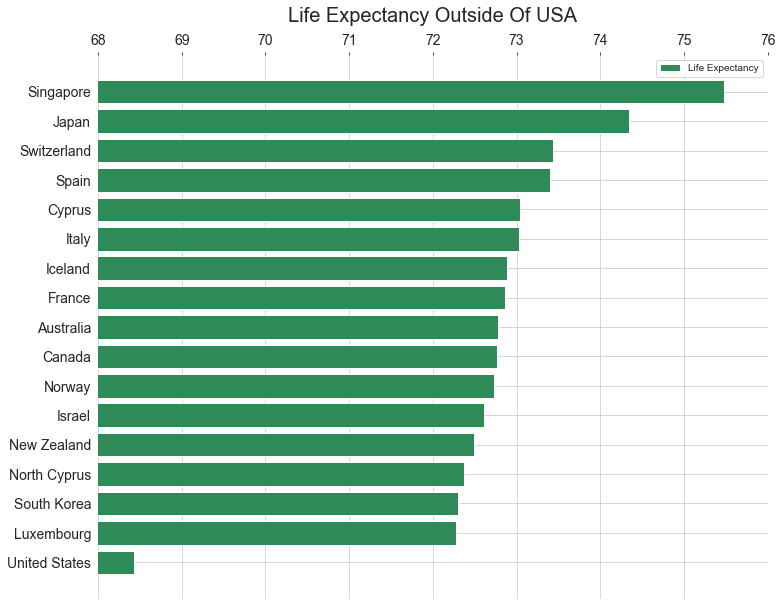

In [78]:
# Countries grouped using country name as index
country_comparison = full_report.groupby("Country").mean()

# Countries happier than USA
usa_ladder_score = country_comparison.loc["United States","Ladder Score"]
greater_than_usa = country_comparison[country_comparison["Ladder Score"] >= usa_ladder_score].sort_values(by="Ladder Score")

# Countries with higher GDP than USA
usa_gdp = country_comparison.loc["United States","Log GDP per capita"]
gdp_higher_usa = country_comparison[country_comparison["Log GDP per capita"] >= usa_gdp].sort_values(by="Log GDP per capita")

# Higher life expectancy than USA
usa_life_expectancy = country_comparison.loc["United States","Life Expectancy"]
life_expectancy_higher_usa = country_comparison[country_comparison["Life Expectancy"] >= usa_life_expectancy].sort_values(by="Life Expectancy", ascending = False)


sns.set_style("whitegrid")

# Happier Countries
fig, ax = plt.subplots(figsize=(12,10))
plt.barh(greater_than_usa.index, greater_than_usa["Ladder Score"], color = "seagreen", label ="Ladder Score")
plt.title("Countries Happier than USA", size = 20, y= 1.05)
plt.xlim(7,7.8)
plt.xticks(size=14)
plt.yticks(size=14)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(axis="both", labelsize=14)
plt.legend()
plt.show()

# GDP higher than usa
fig, ax = plt.subplots(figsize=(12,10))
plt.barh(gdp_higher_usa.index, gdp_higher_usa["Log GDP per capita"], color = "seagreen", label = "Log GDP per Capita")
plt.title("Higher GDP than USA", size = 20, y= 1.05)
plt.xlim(10.75,11.75)
plt.xticks(size=14)
plt.yticks(size=14)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(axis="both", labelsize=14)
plt.legend()
plt.show()

###############################################################################
# Selects only usa
usa_le = life_expectancy_higher_usa[-1:]

# Top 15 countries by life expectancy
highest_le = life_expectancy_higher_usa[:16]

# Appends usa to bottom of top 15 countries by life expectancy for comparison
le_list = highest_le.append(usa_le).sort_values(by="Life Expectancy")
###############################################################################

# Plot results
fig, ax = plt.subplots(figsize=(12,10))
plt.barh(le_list.index, le_list["Life Expectancy"], color = "seagreen", label = "Life Expectancy")
plt.title("Life Expectancy Outside Of USA", size = 20, y= 1.05)
plt.xlim(68,76)
plt.xticks(size=14)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(axis="both", labelsize=14)
plt.yticks(size=14)
plt.legend()
plt.show()

In [79]:
year_2020 = full_report[full_report["Year"] == 2020].reset_index(drop=True).copy()

In [80]:
year_2020.head()

,Country,Year,Ladder Score,Log GDP per capita,Social support,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region,Gini coefficient of income,"COVID-19 deaths per 100,000 (2020)",Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate %,Median Age,Urban Pop %,World Share %
0,Albania,2020,5.364910,9.497252,0.710115,69.300003,0.753671,0.006968,0.891359,0.678661,0.265066,Central and Eastern Europe,28.96,41.038300,2877239.0,-0.11,-3120.0,105.0,27400.0,-14000.0,1.6,36.0,63.0,0.04
1,Argentina,2020,5.900567,9.850450,0.897104,69.199997,0.823392,-0.122354,0.815780,0.763524,0.342497,Latin America and Caribbean,39.60,95.683701,45267449.0,0.93,415097.0,17.0,2736690.0,4800.0,2.3,32.0,93.0,0.58
2,Australia,2020,7.137368,10.759864,0.936517,74.199997,0.905283,0.210030,0.491095,0.769182,0.205078,North America and ANZ,33.00,3.564700,25550683.0,1.18,296686.0,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33
3,Austria,2020,7.213489,10.851118,0.924831,73.599998,0.911910,0.011032,0.463830,0.769317,0.206500,Western Europe,26.80,69.084198,9015361.0,0.57,51296.0,109.0,82409.0,65000.0,1.5,43.0,57.0,0.12
4,Bahrain,2020,6.173176,10.619904,0.847745,69.699997,0.945233,0.132441,0.745639,0.789795,0.296835,Middle East and North Africa,59.60,20.686600,1711057.0,3.68,60403.0,2239.0,760.0,47800.0,2.0,32.0,89.0,0.02


## Conclusions

* The most happiest countries are typically located in developed regions such as Western Europe, North America, and Australia/New Zealand
* GDP, Social Support, and Life Expectancy have the greatest contribution to a nation's overall happiness
* Countries that are happier tend to have longer a longer life expectancy, and therefore generally are also older (higher median age)
* These countries also are usually wealthier, their Log GDP per capita is usually higher than less happier countries
* Along with these factors, social support is also a vital factor; generally happier countries score higher in this factor as well

Why is it that Western countries are typically the most happy, and why are African and Asian countries the least happy? This analysis may be able to explain the correlations and contributing factors of public happiness, but it may be beyond the scope of this project to fully explain why certain regions exhibit varying degrees of happiness. Perhaps there are particular qualities of a society that are condusive to higher happiness and well-being. If every nation shared the same charcateristics of high income, high life expectency, low government corruption, more freedom, and exstensive social programs, would nearly every country score high on happiness?

One factor that may have been neglected is whether or not environmental/ecological circumstances contribute to happiness. Do warmer or colder climates affect happiness? Does the cleanliness of cities/urban areas contribute to well-being. What about factors such as air pollution or clean water; do these things influence public happiness?
Unfortunately these types of questions are not asked during the survey, and it would be quite interesting to see data for this type of subject.


In [81]:
### Next Steps
# Ecological/Environmental factors?

In [82]:
# Granular regional insights

In [83]:
# Year 2020 countries by ladder score

In [84]:
# Fertility Rates

In [85]:
# Urban populations and population density

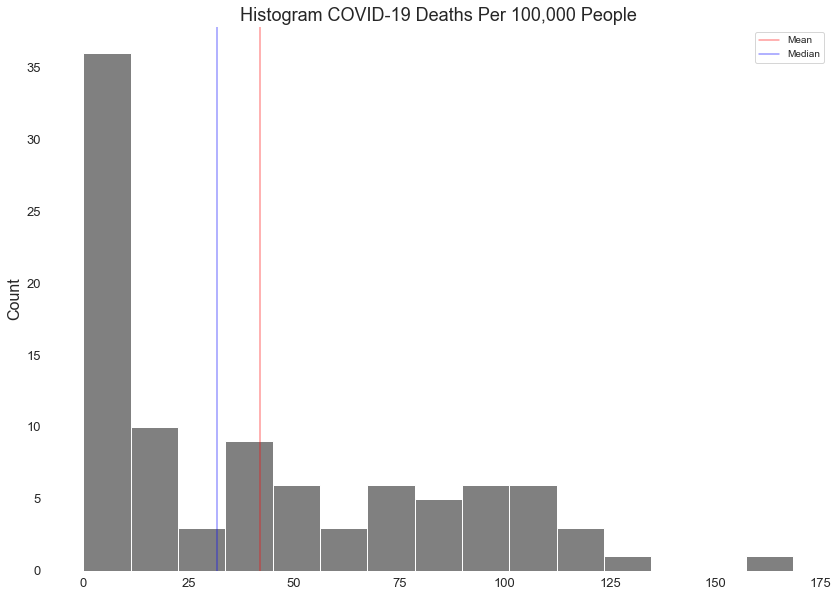

In [91]:
# Distribution of COVID-19 deaths
sns.set_style("white")
fig, ax = plt.subplots(figsize = (14, 10))
plt.hist(year_2020["COVID-19 deaths per 100,000 (2020)"], bins = 15, color = "grey")
plt.axvline(year_2020["COVID-19 deaths per 100,000 (2020)"].mean(), color = "red", alpha = 0.4, label = "Mean")
plt.axvline(year_2020["COVID-19 deaths per 100,000 (2020)"].median(), color = "blue", alpha = 0.4, label = "Median")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.title("Histogram COVID-19 Deaths Per 100,000 People", size = 18)
plt.ylabel("Count", size = 16)
ax.tick_params(axis="both", labelsize=13)
plt.legend()
plt.show()

In [87]:
# Highest countries by deaths
top_20 = np.round(year_2020[["Country","COVID-19 deaths per 100,000 (2020)"]].nlargest(n=20, columns= "COVID-19 deaths per 100,000 (2020)"),2)
top_20

,Country,"COVID-19 deaths per 100,000 (2020)"
6,Belgium,168.50
74,Slovenia,129.73
9,Bosnia and Herzegovina,123.44
42,Italy,122.65
65,North Macedonia,120.14
11,Bulgaria,109.03
77,Spain,108.73
58,Montenegro,108.59
89,United Kingdom,108.45
20,Czech Republic,108.13


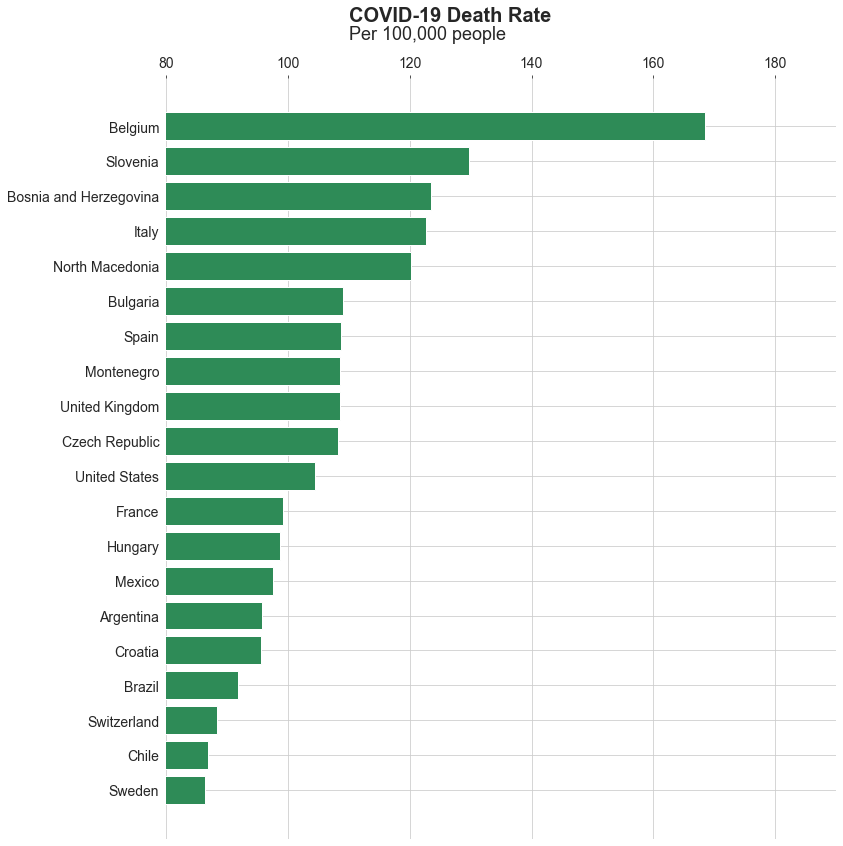

In [88]:
fig, ax = plt.subplots(figsize=(12,14))
ax.barh(top_20["Country"], top_20["COVID-19 deaths per 100,000 (2020)"], color = "seagreen")
plt.gca().invert_yaxis()

plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.xaxis.tick_top()

ax.text(x=110, y=-3, s = "COVID-19 Death Rate", weight = "bold", size = 20)
ax.text(x=110, y=-2.5, s="Per 100,000 people", size = 18)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlim(xmin=80, xmax = 190)
plt.show()

In [89]:
year_2020["Ladder Score"].corr(year_2020["COVID-19 deaths per 100,000 (2020)"])

0.31636675167131767

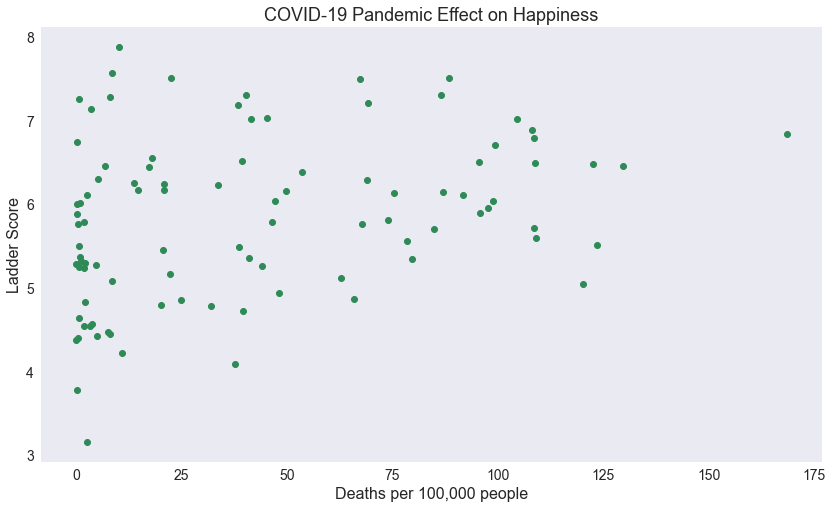

In [90]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(year_2020["COVID-19 deaths per 100,000 (2020)"], year_2020["Ladder Score"], color = "seagreen")
plt.title("COVID-19 Pandemic Effect on Happiness", size=18)
plt.ylabel("Ladder Score", size = 16)
plt.xlabel("Deaths per 100,000 people", size = 16)
ax.tick_params(axis="both", labelsize=14)
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.show()